In [1]:
!pip install openpyxl
!pip install kneed


  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  Using cached kneed-0.8.5-py3-none-any.whl (10 kB)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import DBSCAN, HDBSCAN

from sklearn.metrics.cluster import v_measure_score, homogeneity_score, completeness_score



In [17]:
layered_descriptions_filtered = pd.read_csv("calculated_files/layered_desc_filtered.csv")

In [18]:
layered_descriptions_filtered['concatenated'] =  layered_descriptions_filtered[['Bezeichnung', 'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation']].fillna('').agg(' '.join, axis=1)

layered_descriptions_filtered['concatenated'] = layered_descriptions_filtered['concatenated'].apply(lambda x: x.strip())

There are nan values only in the Detailinformation column, so we only remove them while clusteing based on this column with TF-IDF
However, the rows containing nan values will generally not be dropped, as those rows will have values for the columns Webbezeichnung and Bezeichnung. 
The columns containing  

In [4]:
print(layered_descriptions_filtered.Detailinformation.isna().sum())
print(layered_descriptions_filtered.Webbezeichnung.isna().sum())
print(layered_descriptions_filtered.Bezeichnung.isna().sum())

non_nan = layered_descriptions_filtered.loc[layered_descriptions_filtered.Detailinformation.isna()!=True]
non_nan.shape

61
0
0


(227849, 16)

# TF-IDF clustering

In [19]:
vectorizer = TfidfVectorizer()

## 1) Bezeichnung

In [5]:
# vectorize with tf-idf

cleaned_layered_descriptions = layered_descriptions_filtered.loc[layered_descriptions_filtered['Bezeichnung'] != ' ']
tfidf_matrix = vectorizer.fit_transform(cleaned_layered_descriptions['Bezeichnung'])

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

v_measures_df_tf_idf_bezeichnung = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
homogeneity_measures_df_tf_idf_bezeichnung = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
completness_measures_df_tf_idf_bezeichnung = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])


# A list holds the SSE values for each k
sse_bezeichnung = []
v_measures = []
homogeneity_measures = []
completeness_measures = []


for k in range(1, 440, 5):
# for k in range(1, 150, 5):
    print(k)
    
    kmeans = MiniBatchKMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(tfidf_matrix)
    sse_bezeichnung.append(kmeans.inertia_)

    # calculating the v-measures for each of the subcategories/layers, and adding them to the v_measures_df dataframe
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))
    
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))


    v_measures_df_tf_idf_bezeichnung.loc[len(v_measures_df_tf_idf_bezeichnung)] = v_measures
    homogeneity_measures_df_tf_idf_bezeichnung.loc[len(homogeneity_measures_df_tf_idf_bezeichnung)] = homogeneity_measures
    completness_measures_df_tf_idf_bezeichnung.loc[len(completness_measures_df_tf_idf_bezeichnung)] = completeness_measures

    v_measures = []
    homogeneity_measures = []
    completeness_measures = []

    
    

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
251
256
261
266
271
276
281
286
291
296
301
306
311
316
321
326
331
336
341
346
351
356
361
366
371
376
381
386
391
396
401
406
411
416
421
426
431
436


In [41]:
v_measures_df_tf_idf_bezeichnung.to_csv('calculated_files/evaluation_metric_dfs/v_measures_tfidf_bezeichnung_df.csv', index=False)
homogeneity_measures_df_tf_idf_bezeichnung.to_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_tfidf_bezeichnung_df.csv', index=False)
completness_measures_df_tf_idf_bezeichnung.to_csv('calculated_files/evaluation_metric_dfs/completeness_measures_tfidf_bezeichnung_df.csv', index=False)
np.save('calculated_files/sse/sse_tfidf_bezeichnung.npy', sse_bezeichnung)

# v_measures_df_tf_idf_bezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/v_measures_tfidf_bezeichnung_df.csv')
# homogeneity_measures_df_tf_idf_bezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_tfidf_bezeichnung_df.csv')
# completness_measures_df_tf_idf_bezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/completeness_measures_tfidf_bezeichnung_df.csv')
# sse_bezeichnung = np.load('calculated_files/sse/sse_tfidf_bezeichnung.npy', allow_pickle=True)



### Plotting

##### SSE

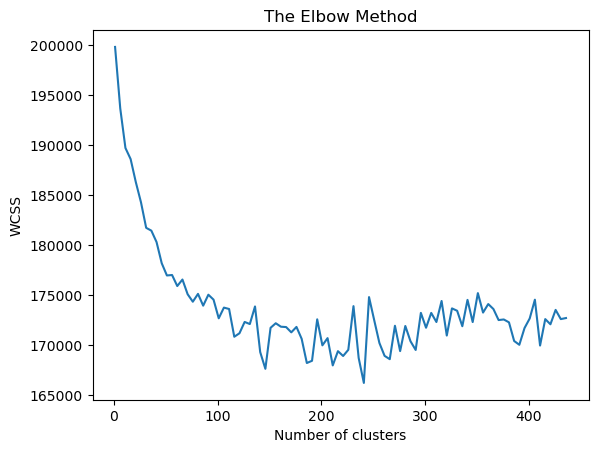

In [9]:
plt.plot(range(1, 440, 5), sse_bezeichnung)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### V-measure

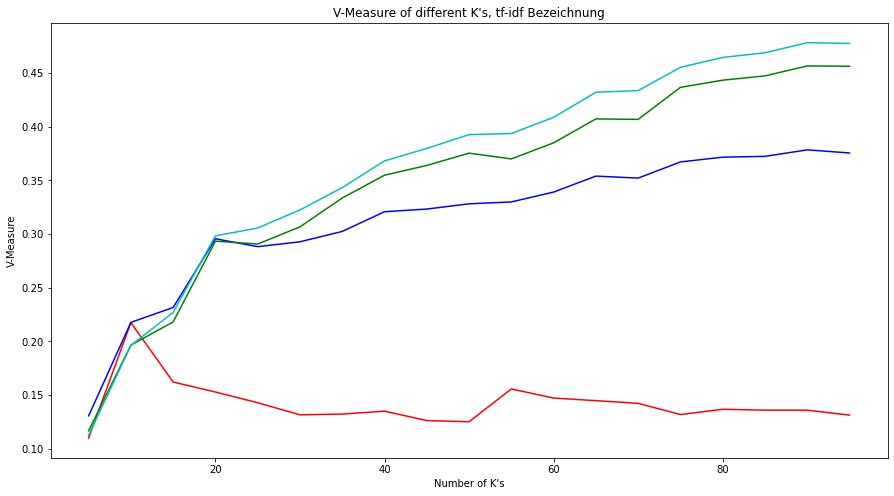

In [30]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), v_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(5, 100, 5), v_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(1, 440, 5), v_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(5, 100, 5), v_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf Bezeichnung")

plt.show()

After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

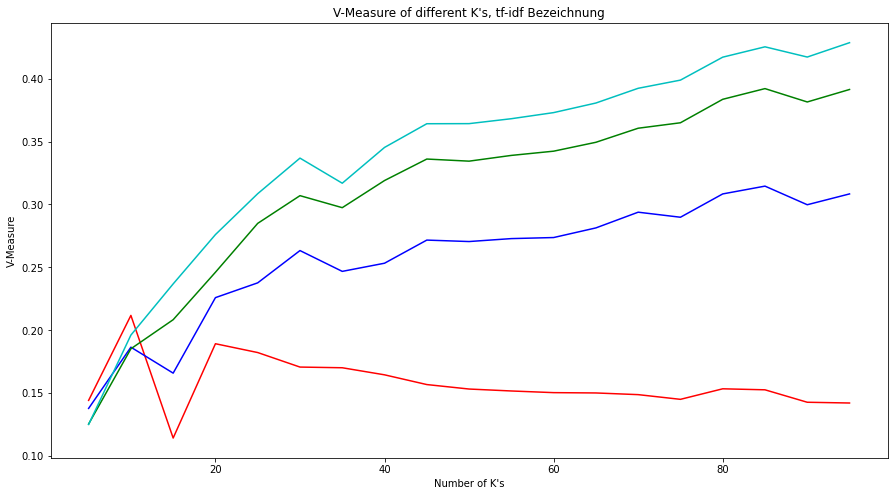

In [43]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), v_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(5, 100, 5), v_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(5, 100, 5), v_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(5, 100, 5), v_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf Bezeichnung")

plt.show()

#### Homogeneity

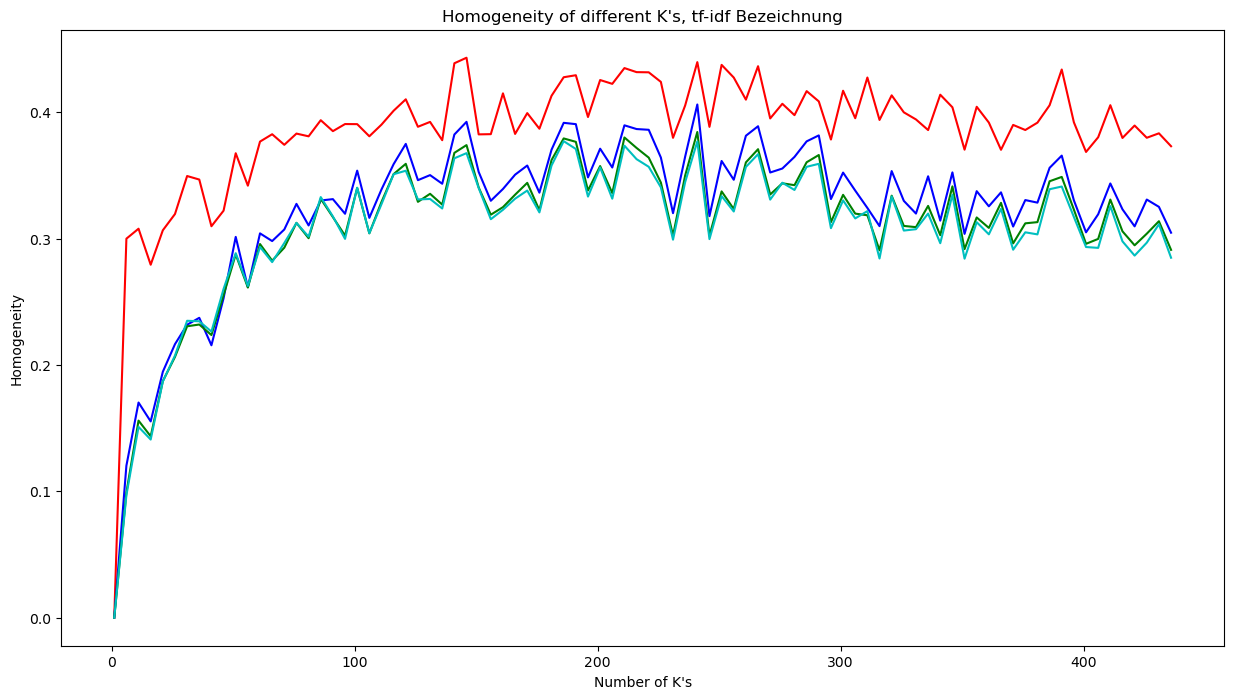

In [10]:
plot, ax = plt.subplots()
plt.plot(range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Bezeichnung")

plt.show() 

After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

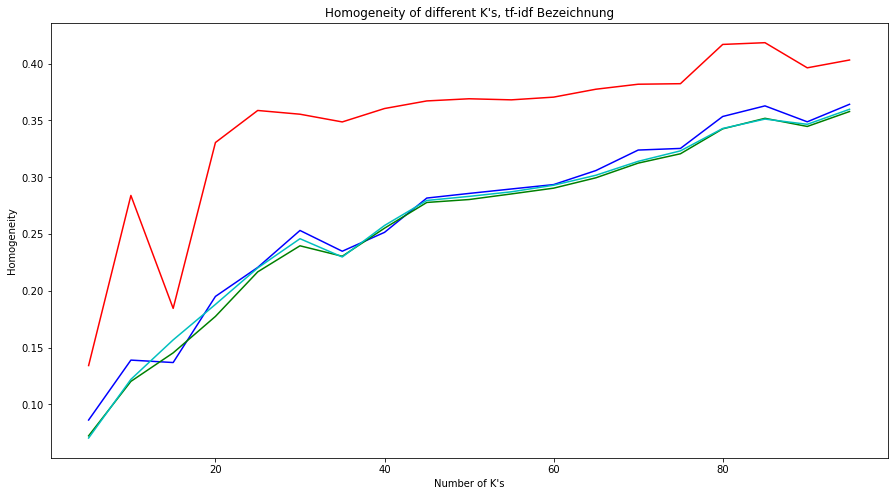

In [44]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(5, 100, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(5, 100, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(5, 100, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Bezeichnung")

plt.show()

#### Completeness

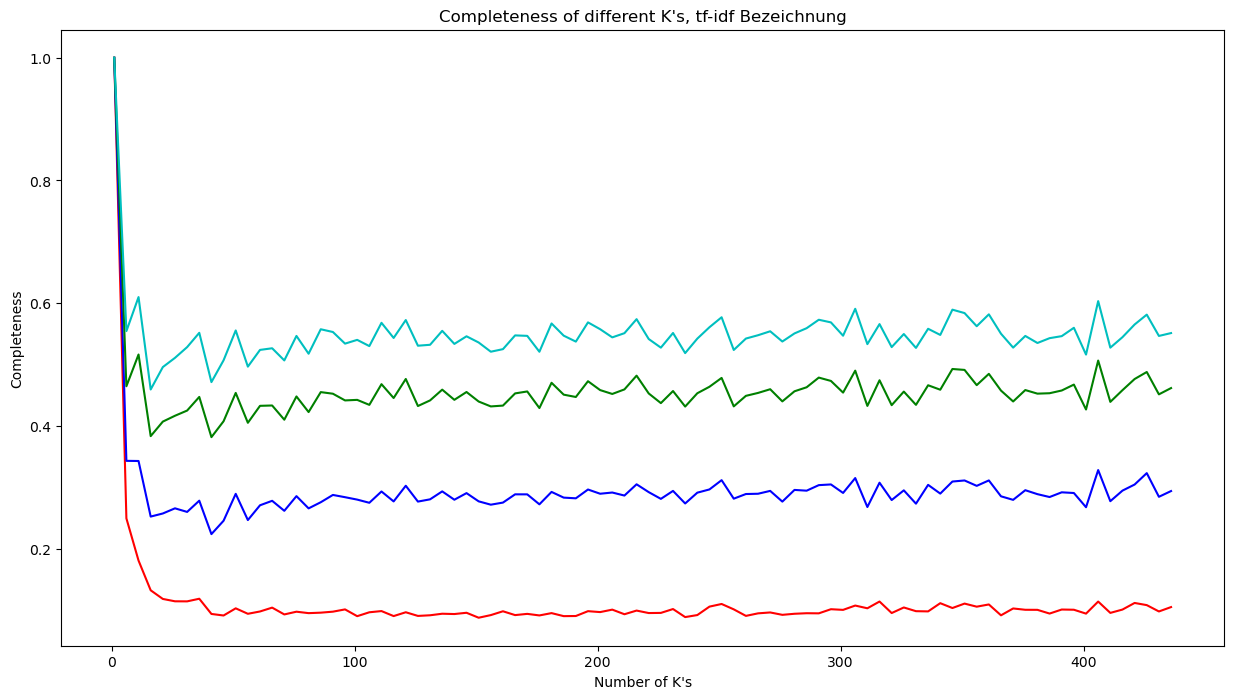

In [11]:
plot, ax = plt.subplots()
plt.plot(range(1, 440, 5), completness_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(1, 440, 5), completness_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(1, 440, 5), completness_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(1, 440, 5), completness_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)


ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Bezeichnung")

plt.show()

After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

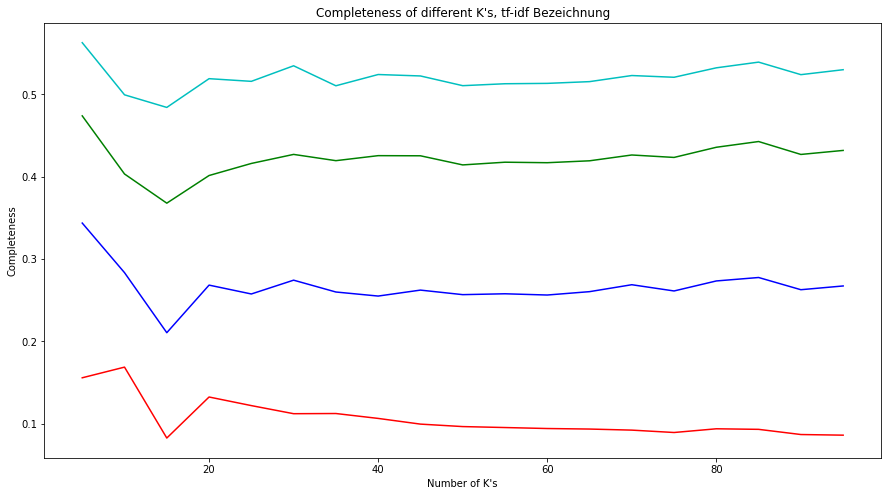

In [45]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), completness_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(5, 100, 5), completness_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(5, 100, 5), completness_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(5, 100, 5), completness_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)


ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Bezeichnung")

plt.show()

##### with 440 clusters

In [6]:
v_measures_df_tf_idf_bezeichnung.to_csv('calculated_files/evaluation_metric_dfs/v_measures_tfidf_bezeichnung_df_440.csv', index=False)
homogeneity_measures_df_tf_idf_bezeichnung.to_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_tfidf_bezeichnung_df_440.csv', index=False)
completness_measures_df_tf_idf_bezeichnung.to_csv('calculated_files/evaluation_metric_dfs/completeness_measures_tfidf_bezeichnung_df_440.csv', index=False)
np.save('calculated_files/sse/sse_tfidf_bezeichnung_440.npy', sse_bezeichnung)

# v_measures_df_tf_idf_bezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/v_measures_tfidf_bezeichnung_df_440.csv')
# homogeneity_measures_df_tf_idf_bezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_tfidf_bezeichnung_df_440.csv')
# completness_measures_df_tf_idf_bezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/completeness_measures_tfidf_bezeichnung_df_440.csv')
# sse_bezeichnung = np.load('calculated_files/sse/sse_tfidf_bezeichnung_440.npy', allow_pickle=True)



SSE

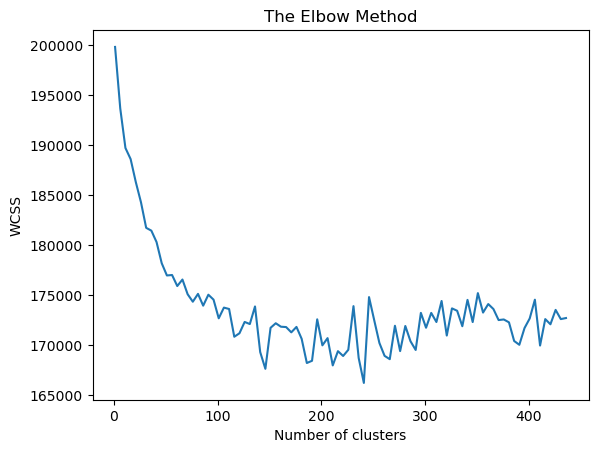

In [7]:
plt.plot(range(1, 440, 5), sse_bezeichnung)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

V-measure

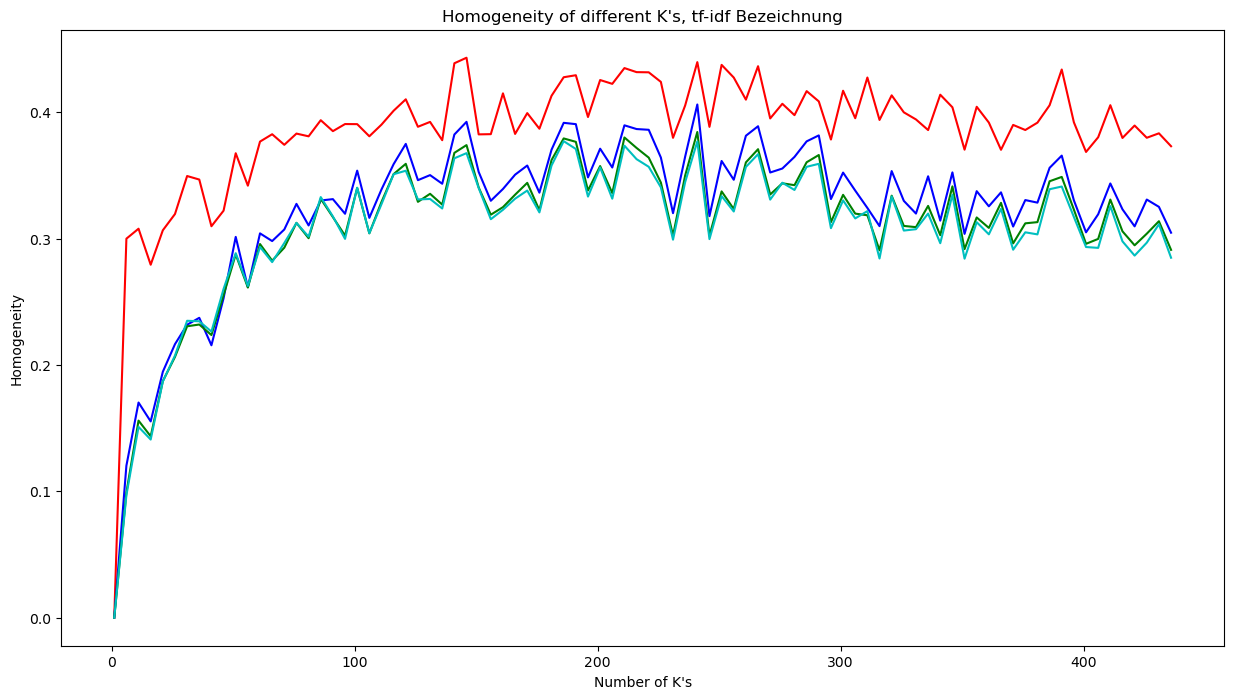

In [8]:
plot, ax = plt.subplots()
plt.plot(range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Bezeichnung")

plt.show() 

Homogeneity

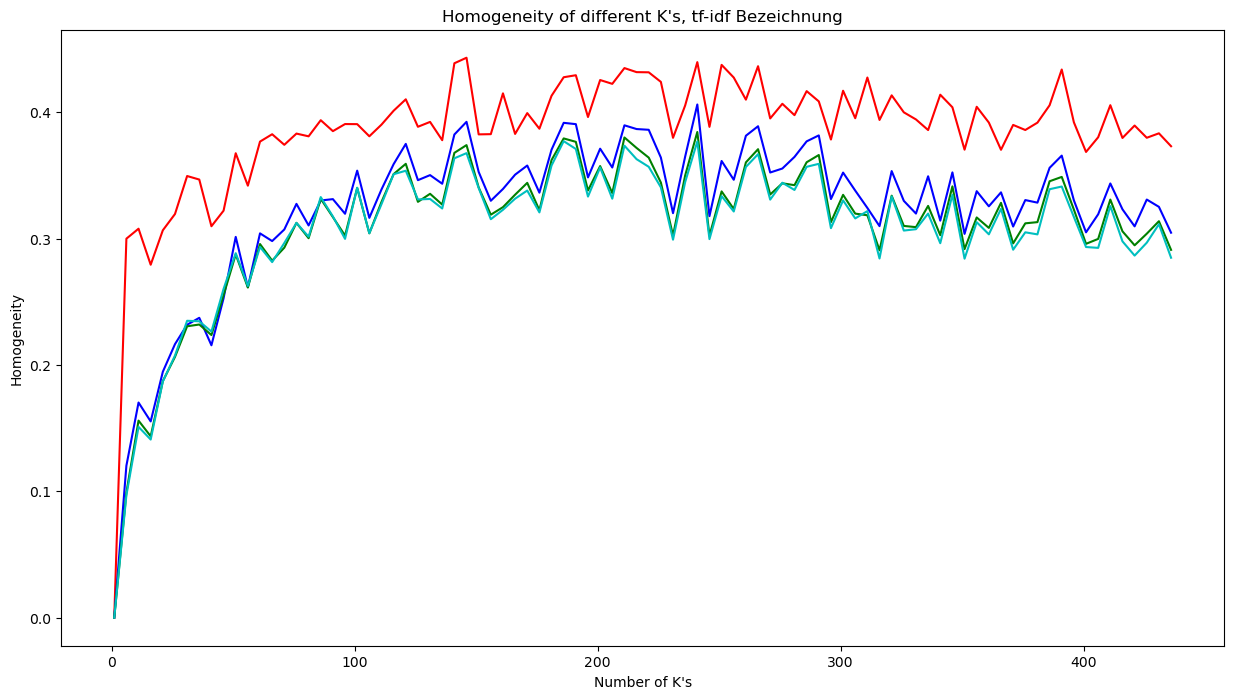

In [9]:
plot, ax = plt.subplots()
plt.plot(range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(1, 440, 5), homogeneity_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Bezeichnung")

plt.show() 

Completeness

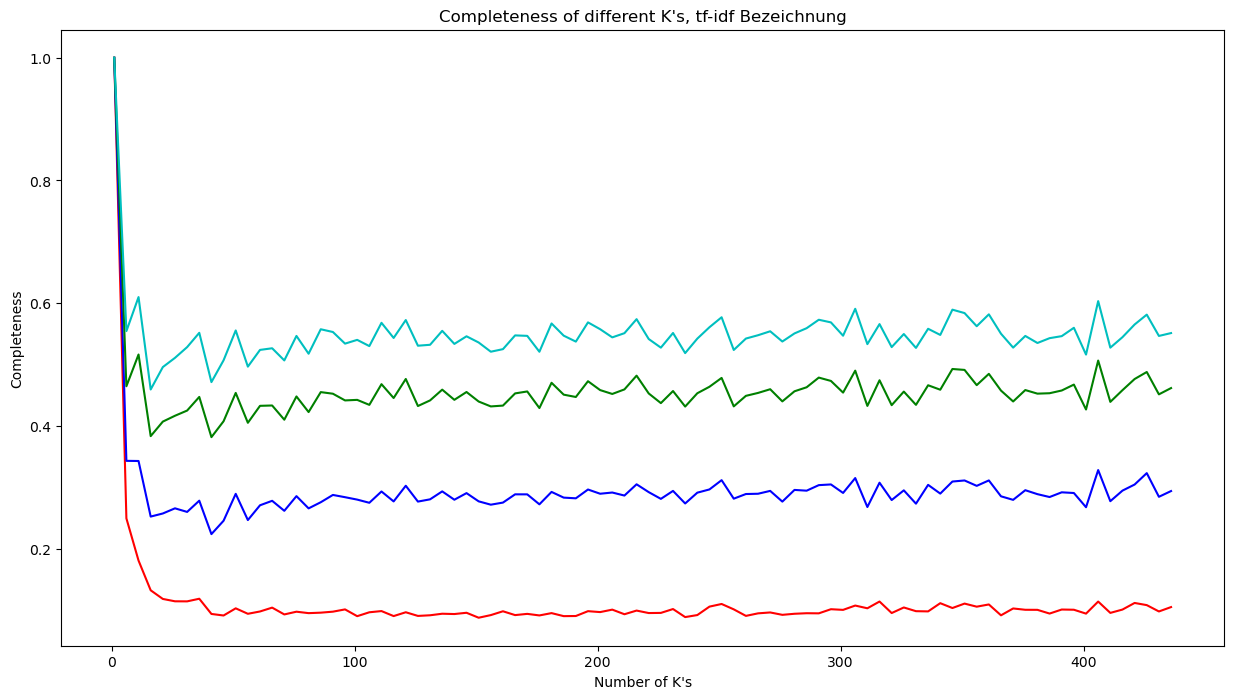

In [10]:
plot, ax = plt.subplots()
plt.plot(range(1, 440, 5), completness_measures_df_tf_idf_bezeichnung['layer_1'], 'r', range(1, 440, 5), completness_measures_df_tf_idf_bezeichnung['layer_2'], 'b', range(1, 440, 5), completness_measures_df_tf_idf_bezeichnung['layer_3'], 'g', range(1, 440, 5), completness_measures_df_tf_idf_bezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)


ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Bezeichnung")

plt.show()

## 2) Webbezeichnung

In [5]:
# vectorize with tf-idf

cleaned_layered_descriptions = layered_descriptions_filtered.loc[layered_descriptions_filtered['Webbezeichnung'] != '  ']
tfidf_matrix = vectorizer.fit_transform(cleaned_layered_descriptions['Webbezeichnung'])

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

v_measures_df_tf_idf_webbezeichnung = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
homogeneity_measures_df_tf_idf_webbezeichnung = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
completness_measures_df_tf_idf_webbezeichnung = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])


# A list holds the SSE values for each k
sse_webbezeichnung = []
v_measures = []
homogeneity_measures = []
completeness_measures = []

# for k in range(1, 150, 5):
for k in range(1, 440, 5):
    print(k)
    kmeans = MiniBatchKMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(tfidf_matrix)
    sse_webbezeichnung.append(kmeans.inertia_)

    # calculating the v-measures for each of the subcategories/layers, and adding them to the v_measures_df dataframe
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_)) 
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))


    v_measures_df_tf_idf_webbezeichnung.loc[len(v_measures_df_tf_idf_webbezeichnung)] = v_measures
    homogeneity_measures_df_tf_idf_webbezeichnung.loc[len(homogeneity_measures_df_tf_idf_webbezeichnung)] = homogeneity_measures
    completness_measures_df_tf_idf_webbezeichnung.loc[len(completness_measures_df_tf_idf_webbezeichnung)] = completeness_measures

    v_measures = []
    homogeneity_measures = []
    completeness_measures = []



1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
251
256
261
266
271
276
281
286
291
296
301
306
311
316
321
326
331
336
341
346
351
356
361
366
371
376
381
386
391
396
401
406
411
416
421
426
431
436


In [19]:
v_measures_df_tf_idf_webbezeichnung.to_csv('calculated_files/evaluation_metric_dfs/v_measures_tfidf_webbezeichnung_df.csv', index=False)
homogeneity_measures_df_tf_idf_webbezeichnung.to_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_tfidf_webbezeichnung_df.csv', index=False)
completness_measures_df_tf_idf_webbezeichnung.to_csv('calculated_files/evaluation_metric_dfs/completeness_measures_tfidf_webbezeichnung_df.csv', index=False)
np.save('calculated_files/sse/sse_tfidf_webbezeichnung.npy', sse_webbezeichnung)

# v_measures_df_tf_idf_webbezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/v_measures_tfidf_webbezeichnung_df.csv')
# homogeneity_measures_df_tf_idf_webbezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_tfidf_webbezeichnung_df.csv')
# completness_measures_df_tf_idf_webbezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/completeness_measures_tfidf_webbezeichnung_df.csv')
# sse_webbezeichnung = np.load('calculated_files/sse/sse_tfidf_webbezeichnung.npy', allow_pickle=True)


### Plotting

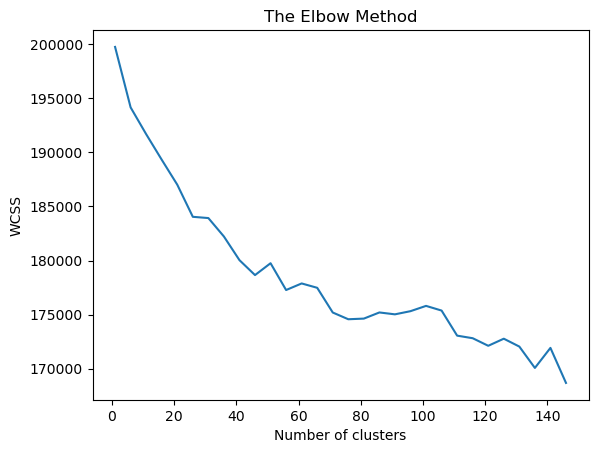

In [21]:
plt.plot(range(1, 150, 5), sse_webbezeichnung)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### V-measure

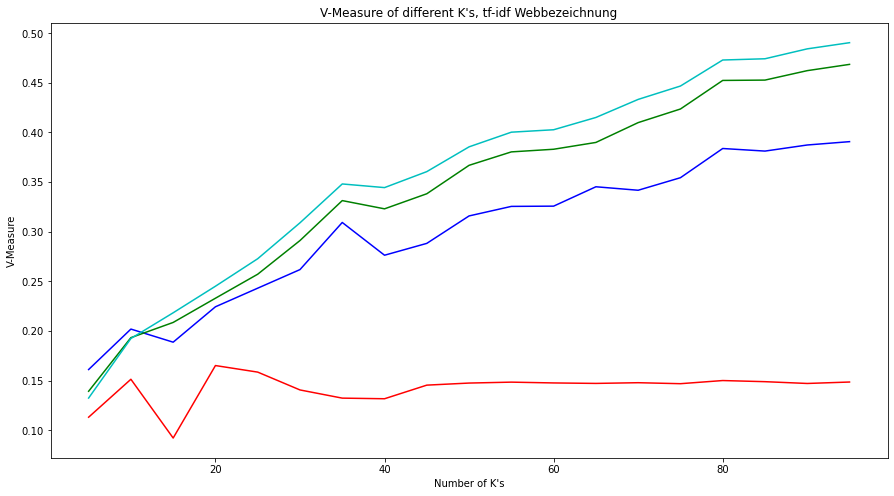

In [25]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), v_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(5, 100, 5), v_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(5, 100, 5), v_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(5, 100, 5), v_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf Webbezeichnung")

plt.show()


After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

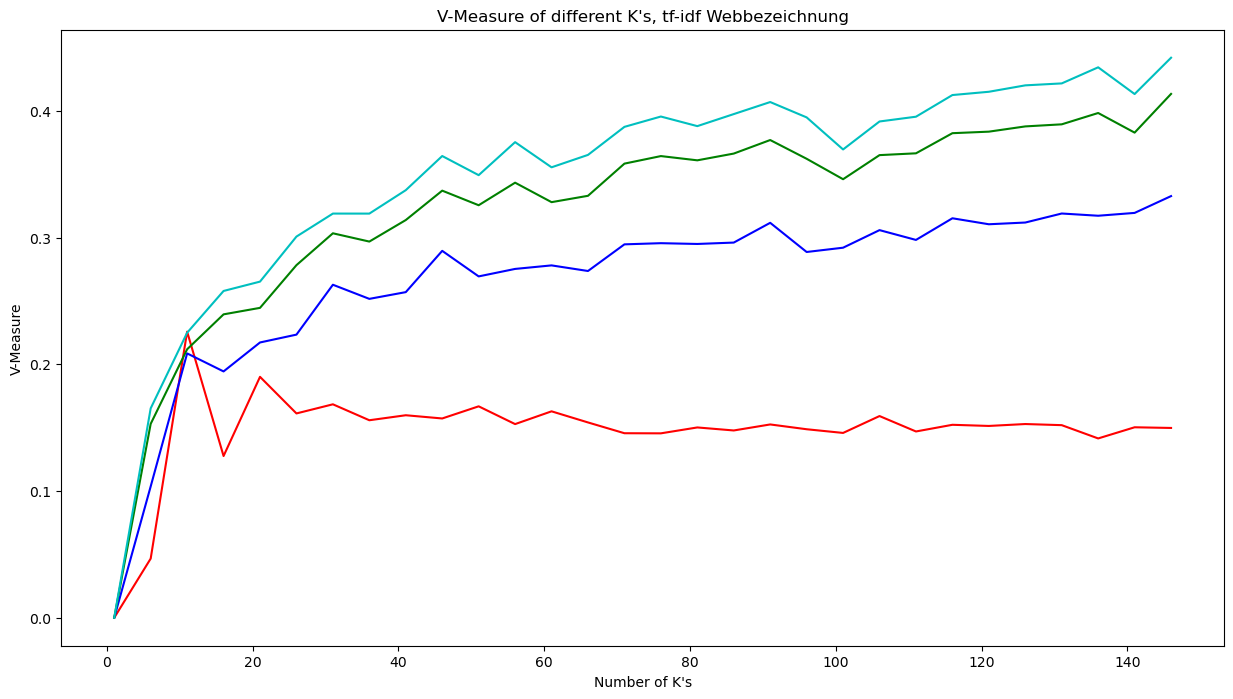

In [16]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), v_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(1, 150, 5), v_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(1, 150, 5), v_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(1, 150, 5), v_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf Webbezeichnung")

plt.show()


#### Homogeneity

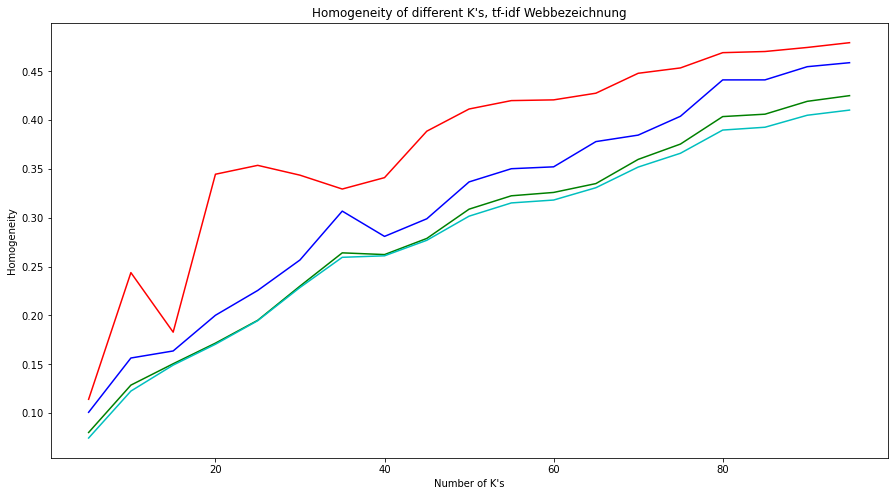

In [26]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(5, 100, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(5, 100, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(5, 100, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Webbezeichnung")

plt.show()

After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

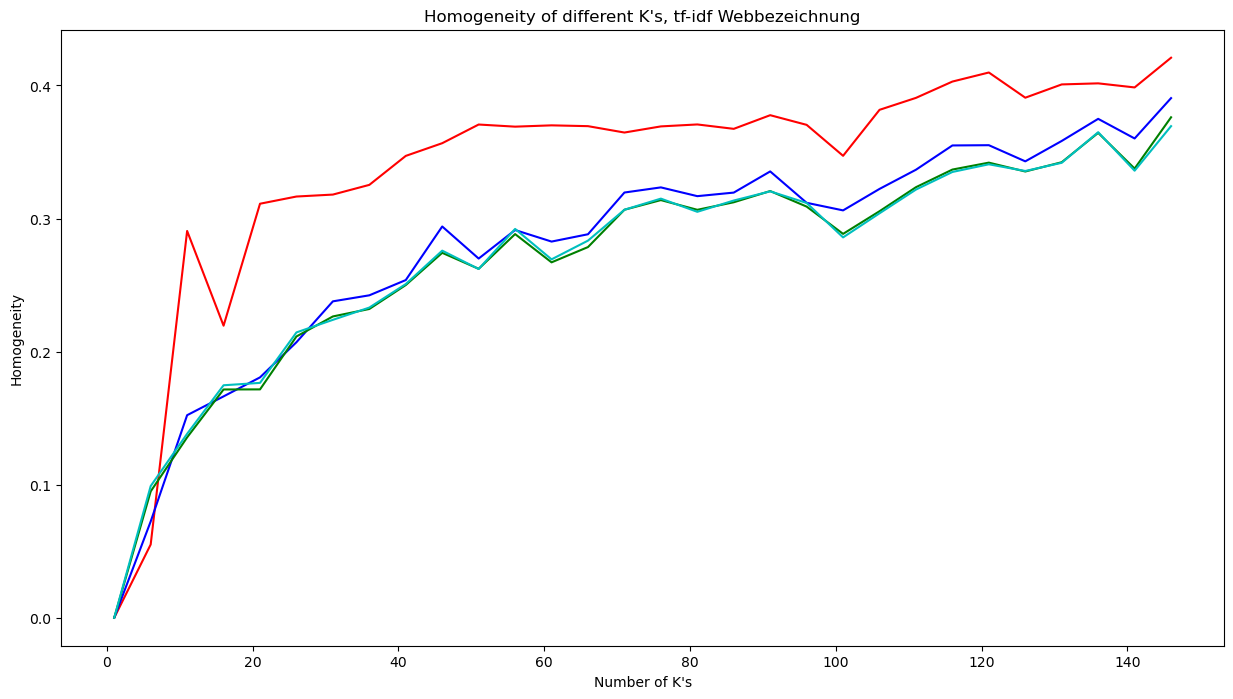

In [15]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(1, 150, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(1, 150, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(1, 150, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Webbezeichnung")

plt.show()

#### Completeness

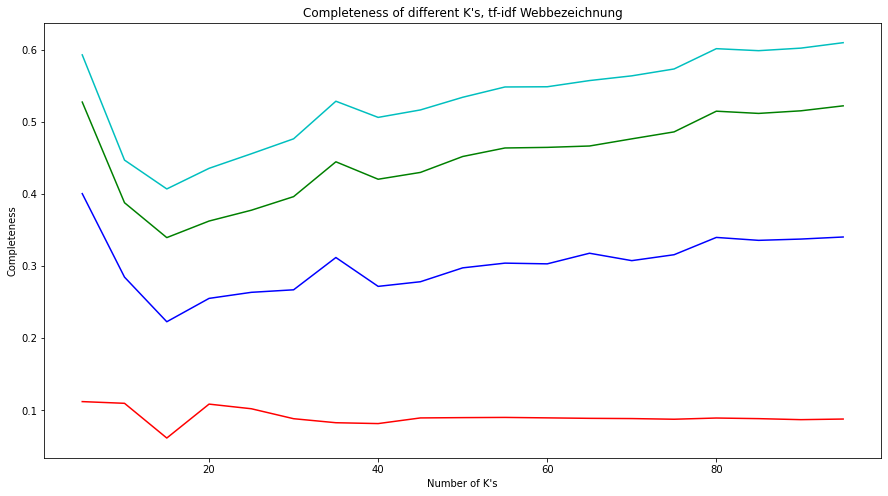

In [27]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), completness_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(5, 100, 5), completness_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(5, 100, 5), completness_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(5, 100, 5), completness_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Webbezeichnung")

plt.show()

After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

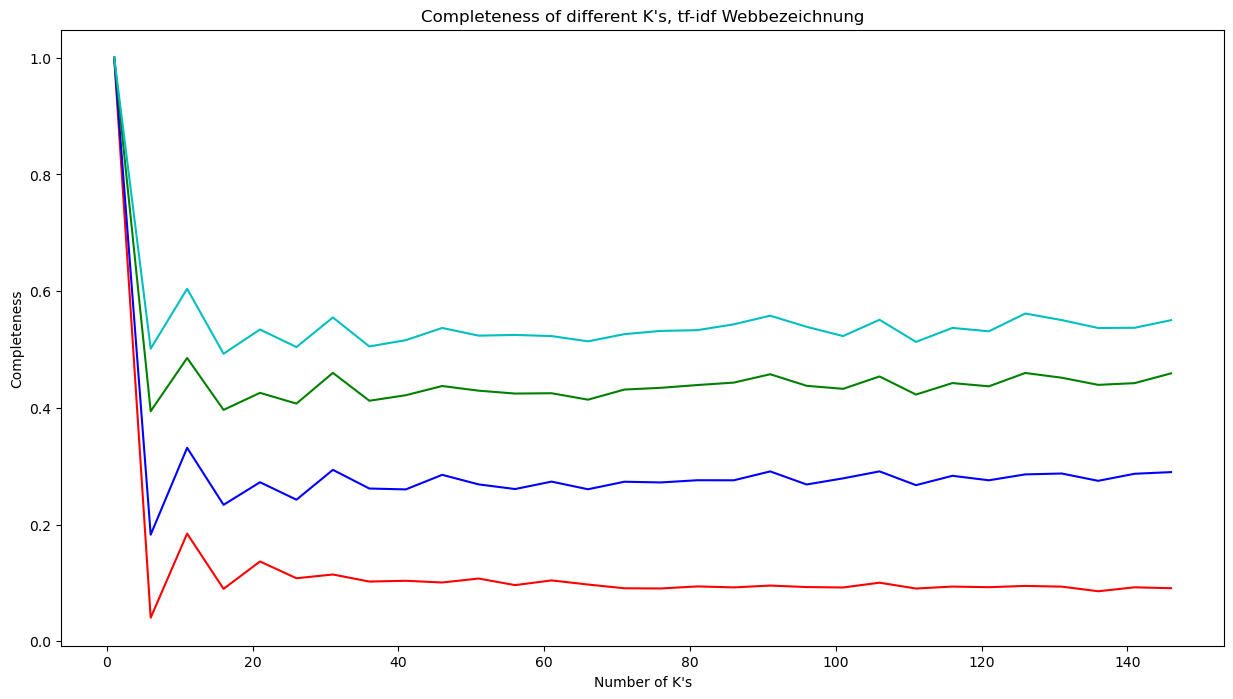

In [14]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), completness_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(1, 150, 5), completness_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(1, 150, 5), completness_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(1, 150, 5), completness_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Webbezeichnung")

plt.show()

##### with 440 clusters

In [6]:
v_measures_df_tf_idf_webbezeichnung.to_csv('calculated_files/evaluation_metric_dfs/v_measures_tfidf_webbezeichnung_df_440.csv', index=False)
homogeneity_measures_df_tf_idf_webbezeichnung.to_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_tfidf_webbezeichnung_df_440.csv', index=False)
completness_measures_df_tf_idf_webbezeichnung.to_csv('calculated_files/evaluation_metric_dfs/completeness_measures_tfidf_webbezeichnung_df_440.csv', index=False)
np.save('calculated_files/sse/sse_tfidf_webbezeichnung_440.npy', sse_webbezeichnung)

# v_measures_df_tf_idf_webbezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/v_measures_tfidf_webbezeichnung_df_440.csv')
# homogeneity_measures_df_tf_idf_webbezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_tfidf_webbezeichnung_df_440.csv')
# completness_measures_df_tf_idf_webbezeichnung = pd.read_csv('calculated_files/evaluation_metric_dfs/completeness_measures_tfidf_webbezeichnung_df_440.csv')
# sse_webbezeichnung = np.load('calculated_files/sse/sse_tfidf_webbezeichnung_440.npy', allow_pickle=True)


###### V-measure

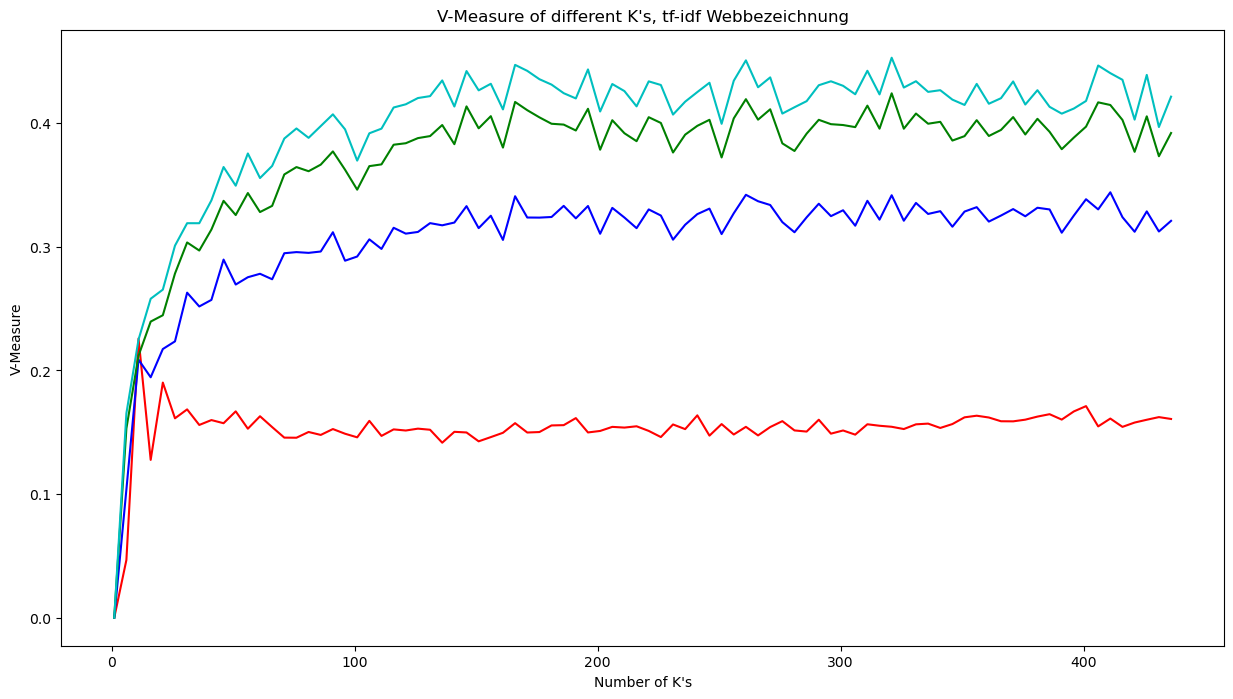

In [7]:
plot, ax = plt.subplots()
plt.plot(range(1, 440, 5), v_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(1, 440, 5), v_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(1, 440, 5), v_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(1, 440, 5), v_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf Webbezeichnung")

plt.show()


###### Homogeneity

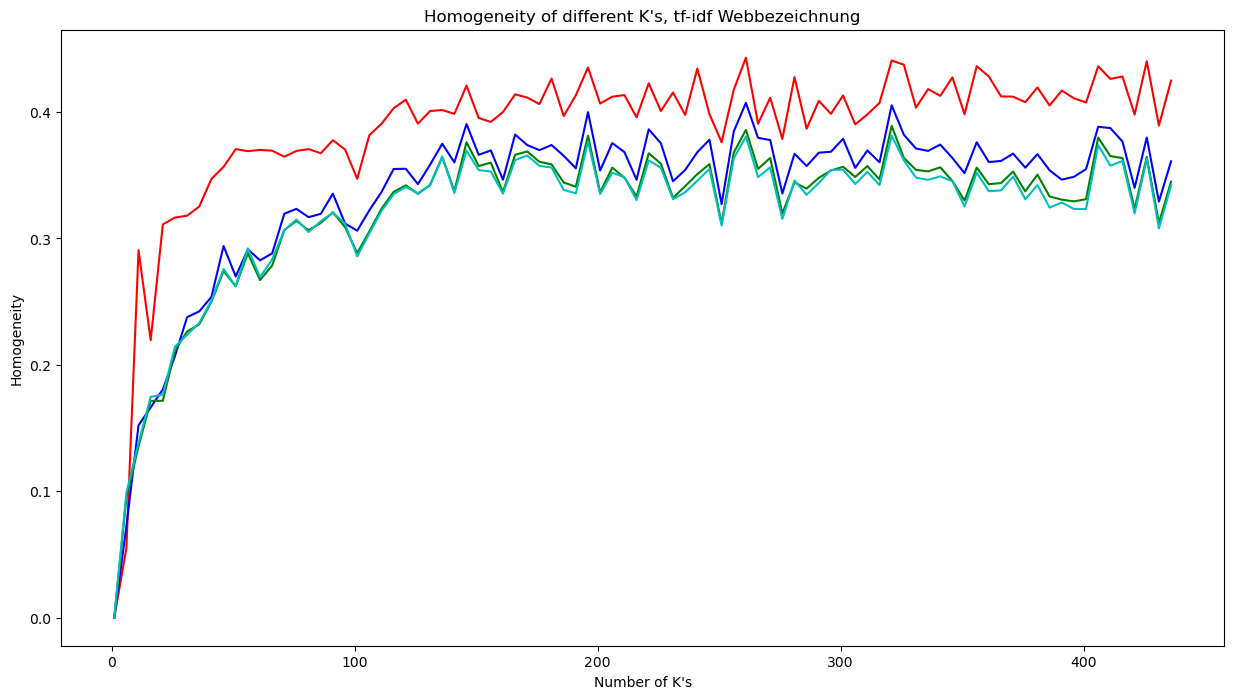

In [8]:
plot, ax = plt.subplots()
plt.plot(range(1, 440, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(1, 440, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(1, 440, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(1, 440, 5), homogeneity_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Webbezeichnung")

plt.show()

###### Completeness

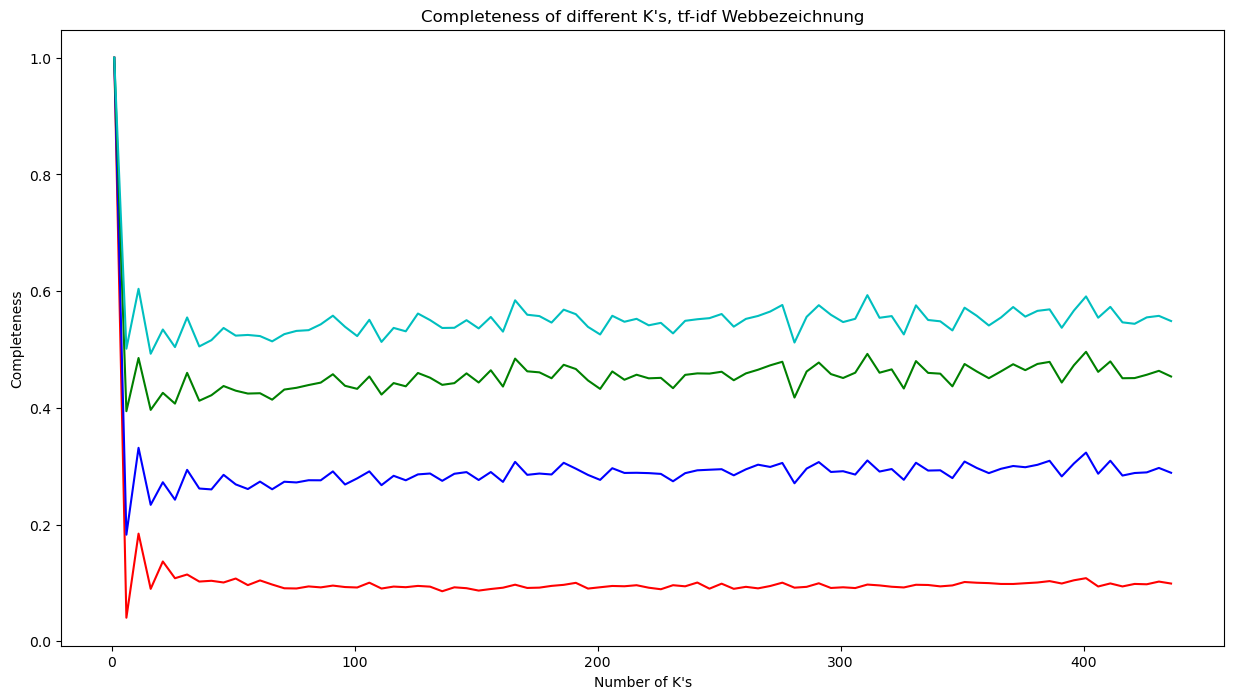

In [9]:
plot, ax = plt.subplots()
plt.plot(range(1, 440, 5), completness_measures_df_tf_idf_webbezeichnung['layer_1'], 'r', range(1, 440, 5), completness_measures_df_tf_idf_webbezeichnung['layer_2'], 'b', range(1, 440, 5), completness_measures_df_tf_idf_webbezeichnung['layer_3'], 'g', range(1, 440, 5), completness_measures_df_tf_idf_webbezeichnung['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Webbezeichnung")

plt.show()

## 3) Detailinformation

### Word embedding on data dumps 
to check if the products removed were of the same cluster. 


In [11]:
layered_descriptions_filtered.columns

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke', 'class_count', 'layer_1', 'layer_2',
       'layer_3', 'layer_4', 'concatenated', 'AttributeKey', 'AttributeValue',
       'Purpose'],
      dtype='object')

In [10]:
# vectorize with tf-idf
cleaned_layered_descriptions = layered_descriptions_filtered.loc[layered_descriptions_filtered['Detailinformation'] != ' ']
cleaned_layered_descriptions = cleaned_layered_descriptions.loc[cleaned_layered_descriptions.Detailinformation.isna()!=True]
tfidf_matrix = vectorizer.fit_transform(cleaned_layered_descriptions['Detailinformation'])

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

v_measures_df_tf_idf_detailinformation = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
homogeneity_measures_df_tf_idf_detailinformation = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
completness_measures_df_tf_idf_detailinformation = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])


# A list holds the SSE values for each k
sse_detail = []
v_measures = []
homogeneity_measures = []
completeness_measures = []

# for k in range(1, 150, 5):
for k in range(1, 440, 5):
    print(k)
    kmeans = MiniBatchKMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(tfidf_matrix)
    sse_detail.append(kmeans.inertia_)

    # calculating the v-measures for each of the subcategories/layers, and adding them to the v_measures_df dataframe
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))


    v_measures_df_tf_idf_detailinformation.loc[len(v_measures_df_tf_idf_detailinformation)] = v_measures
    homogeneity_measures_df_tf_idf_detailinformation.loc[len(homogeneity_measures_df_tf_idf_detailinformation)] = homogeneity_measures
    completness_measures_df_tf_idf_detailinformation.loc[len(completness_measures_df_tf_idf_detailinformation)] = completeness_measures

    v_measures = []
    homogeneity_measures = []
    completeness_measures = []



1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
251
256
261
266
271
276
281
286
291
296
301
306
311
316
321
326
331
336
341
346
351
356
361
366
371
376
381
386
391
396
401
406
411
416
421
426
431
436


In [6]:
v_measures_df_tf_idf_detailinformation.to_csv('calculated_files/evaluation_metric_dfs/v_measures_df_tf_idf_detailinformation_minibatchkmeans.csv', index=False)
homogeneity_measures_df_tf_idf_detailinformation.to_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_df_tf_idf_detailinformation_minibatchkmeans.csv', index=False)
completness_measures_df_tf_idf_detailinformation.to_csv('calculated_files/evaluation_metric_dfs/completness_measures_df_tf_idf_detailinformation_minibatchkmeans.csv', index=False)
np.save('calculated_files/sse/sse_detail.npy', sse_detail)

# v_measures_df_tf_idf_detailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/v_measures_df_tf_idf_detailinformation_minibatchkmeans.csv')
# homogeneity_measures_df_tf_idf_detailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_df_tf_idf_detailinformation_minibatchkmeans.csv')
# completness_measures_df_tf_idf_detailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/completness_measures_df_tf_idf_detailinformation_minibatchkmeans.csv')
# sse_detail = np.load('calculated_files/sse/sse_detail.npy', allow_pickle=True)


### Plotting

Elbow

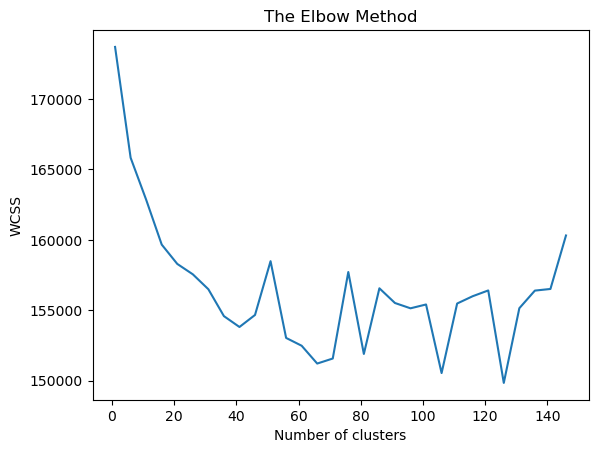

In [20]:
plt.plot(range(1, 150, 5), sse_detail)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#### V-measure

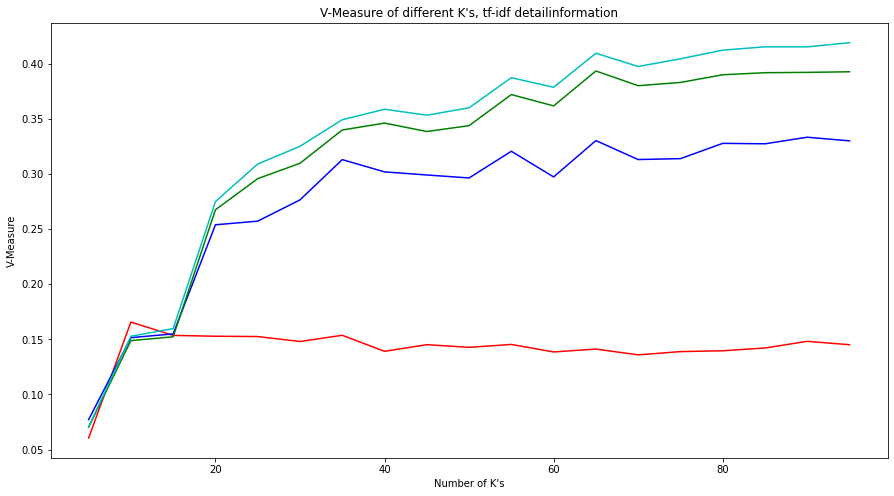

In [18]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), v_measures_df_tf_idf_detailinformation['layer_1'], 'r', range(5, 100, 5), v_measures_df_tf_idf_detailinformation['layer_2'], 'b', range(5, 100, 5), v_measures_df_tf_idf_detailinformation['layer_3'], 'g', range(5, 100, 5), v_measures_df_tf_idf_detailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf Detailinformation")

plt.show()

#### Homogeneity

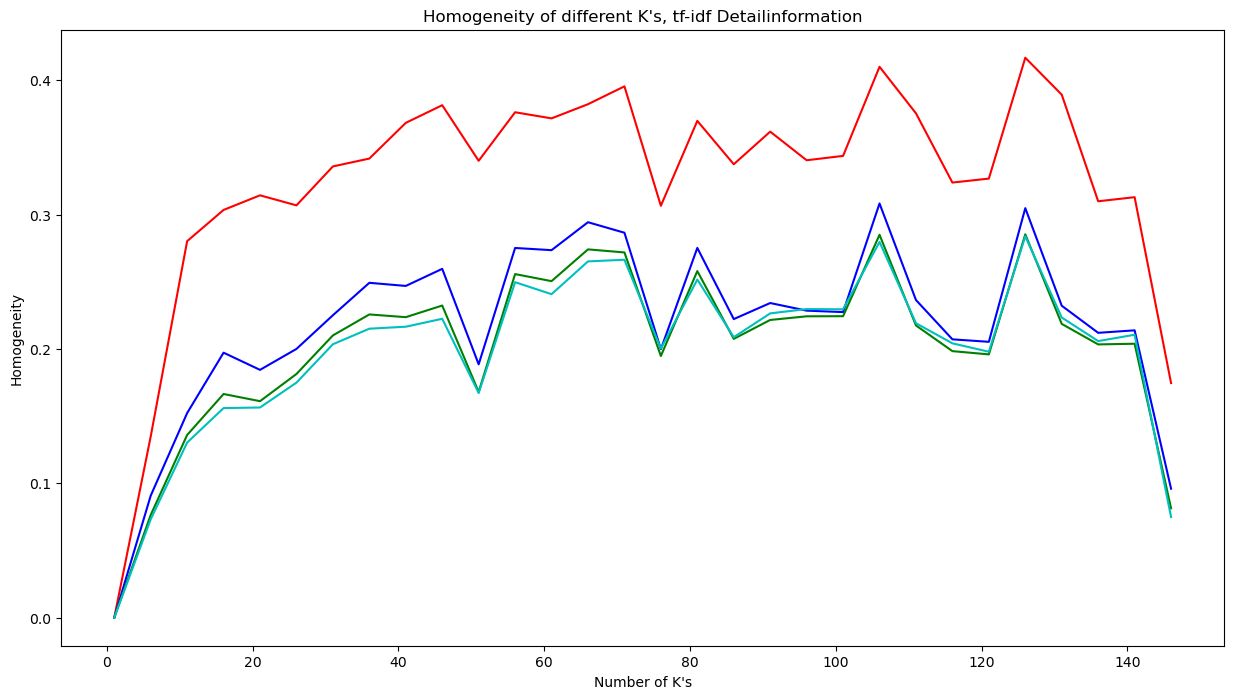

In [22]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), homogeneity_measures_df_tf_idf_detailinformation['layer_1'], 'r', range(1, 150, 5), homogeneity_measures_df_tf_idf_detailinformation['layer_2'], 'b', range(1, 150, 5), homogeneity_measures_df_tf_idf_detailinformation['layer_3'], 'g', range(1, 150, 5), homogeneity_measures_df_tf_idf_detailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Detailinformation")

plt.show()

#### Completeness

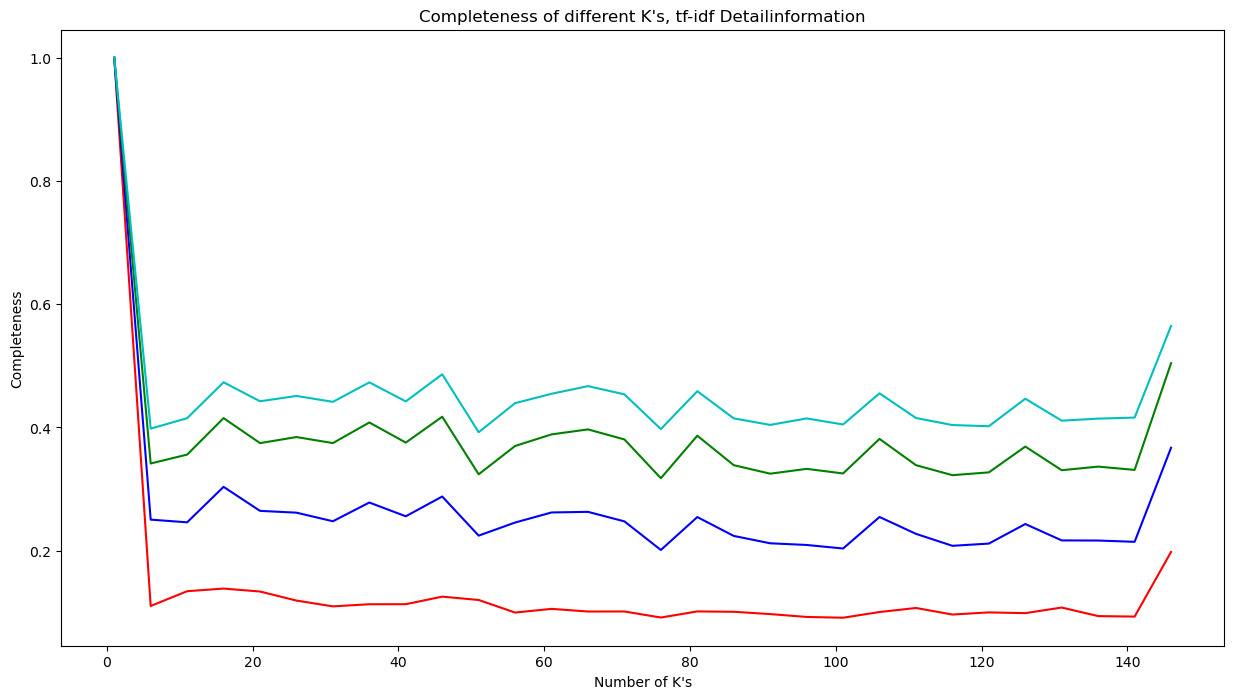

In [23]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), completness_measures_df_tf_idf_detailinformation['layer_1'], 'r', range(1, 150, 5), completness_measures_df_tf_idf_detailinformation['layer_2'], 'b', range(1, 150, 5), completness_measures_df_tf_idf_detailinformation['layer_3'], 'g', range(1, 150, 5), completness_measures_df_tf_idf_detailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Detailinformation")

plt.show()

##### With 440 clusters

In [11]:
v_measures_df_tf_idf_detailinformation.to_csv('calculated_files/evaluation_metric_dfs/v_measures_df_tf_idf_detailinformation_440.csv', index=False)
homogeneity_measures_df_tf_idf_detailinformation.to_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_df_tf_idf_detailinformation_440.csv', index=False)
completness_measures_df_tf_idf_detailinformation.to_csv('calculated_files/evaluation_metric_dfs/completness_measures_df_tf_idf_detailinformation_440.csv', index=False)
np.save('calculated_files/sse/sse_detail_440.npy', sse_detail)

# v_measures_df_tf_idf_detailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/v_measures_df_tf_idf_detailinformation_440.csv')
# homogeneity_measures_df_tf_idf_detailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_df_tf_idf_detailinformation_440.csv')
# completness_measures_df_tf_idf_detailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/completness_measures_df_tf_idf_detailinformation_440.csv')
# sse_detail = np.load('calculated_files/sse/sse_detail_440.npy', allow_pickle=True)


###### V-measure

In [ ]:
plot, ax = plt.subplots()
plt.plot(range(1, 226, 5), v_measures_df_tf_idf_detailinformation['layer_1'], 'r',
         range(1, 226, 5), v_measures_df_tf_idf_detailinformation['layer_2'], 'b',
         range(1, 226, 5), v_measures_df_tf_idf_detailinformation['layer_3'], 'g',
         range(1, 226, 5), v_measures_df_tf_idf_detailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf Detailinformation")

plt.show()

###### Homogeneity

In [ ]:
plot, ax = plt.subplots()
plt.plot(range(1, 226, 5), homogeneity_measures_df_tf_idf_detailinformation['layer_1'], 'r',
         range(1, 226, 5), homogeneity_measures_df_tf_idf_detailinformation['layer_2'], 'b',
         range(1, 226, 5), homogeneity_measures_df_tf_idf_detailinformation['layer_3'], 'g',
         range(1, 226, 5), homogeneity_measures_df_tf_idf_detailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Detailinformation")

plt.show()

###### Completeness

In [ ]:
plot, ax = plt.subplots()
plt.plot(range(1, 226, 5), completness_measures_df_tf_idf_detailinformation['layer_1'], 'r',
         range(1, 226, 5), completness_measures_df_tf_idf_detailinformation['layer_2'], 'b',
         range(1, 226, 5), completness_measures_df_tf_idf_detailinformation['layer_3'], 'g',
         range(1, 226, 5), completness_measures_df_tf_idf_detailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Detailinformation")

plt.show()

## 4) LieferantenDetailinformation

In [25]:
# vectorize with tf-idf
cleaned_layered_descriptions = layered_descriptions_filtered.loc[layered_descriptions_filtered['LieferantenDetailinformation'] != ' ']
cleaned_layered_descriptions = cleaned_layered_descriptions.loc[cleaned_layered_descriptions.LieferantenDetailinformation.isna()!=True]
tfidf_matrix = vectorizer.fit_transform(cleaned_layered_descriptions['LieferantenDetailinformation'])

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

v_measures_df_tf_idf_lieferantendetailinformation = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
homogeneity_measures_df_tf_idf_lieferantendetailinformation = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
completness_measures_df_tf_idf_lieferantendetailinformation = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])


# A list holds the SSE values for each k
sse_lieferanten = []
v_measures = []
homogeneity_measures = []
completeness_measures = []

for k in range(1, 150, 5):
    print(k)
    kmeans = MiniBatchKMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(tfidf_matrix)
    sse_lieferanten.append(kmeans.inertia_)

    # calculating the v-measures for each of the subcategories/layers, and adding them to the v_measures_df dataframe
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))


    v_measures_df_tf_idf_lieferantendetailinformation.loc[len(v_measures_df_tf_idf_lieferantendetailinformation)] = v_measures
    homogeneity_measures_df_tf_idf_lieferantendetailinformation.loc[len(homogeneity_measures_df_tf_idf_lieferantendetailinformation)] = homogeneity_measures
    completness_measures_df_tf_idf_lieferantendetailinformation.loc[len(completness_measures_df_tf_idf_lieferantendetailinformation)] = completeness_measures

    v_measures = []
    homogeneity_measures = []
    completeness_measures = []



1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146


In [26]:
v_measures_df_tf_idf_lieferantendetailinformation.to_csv('calculated_files/evaluation_metric_dfs/v_measures_df_tf_idf_lieferantendetailinformation.csv', index=False)
homogeneity_measures_df_tf_idf_lieferantendetailinformation.to_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_df_tf_idf_lieferantendetailinformation.csv', index=False)
completness_measures_df_tf_idf_lieferantendetailinformation.to_csv('calculated_files/evaluation_metric_dfs/completness_measures_df_tf_idf_lieferantendetailinformation.csv', index=False)
np.save('calculated_files/sse/sse_lieferanten.npy', sse_lieferanten)

# v_measures_df_tf_idf_lieferantendetailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/v_measures_df_tf_idf_lieferantendetailinformation.csv')
# homogeneity_measures_df_tf_idf_lieferantendetailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_df_tf_idf_lieferantendetailinformation.csv')
# completness_measures_df_tf_idf_lieferantendetailinformation = pd.read_csv('calculated_files/evaluation_metric_dfs/completness_measures_df_tf_idf_lieferantendetailinformation.csv')
# sse_lieferanten = np.load('calculated_files/sse/sse_lieferanten.npy', allow_pickle=True)


### Plotting

elbow method

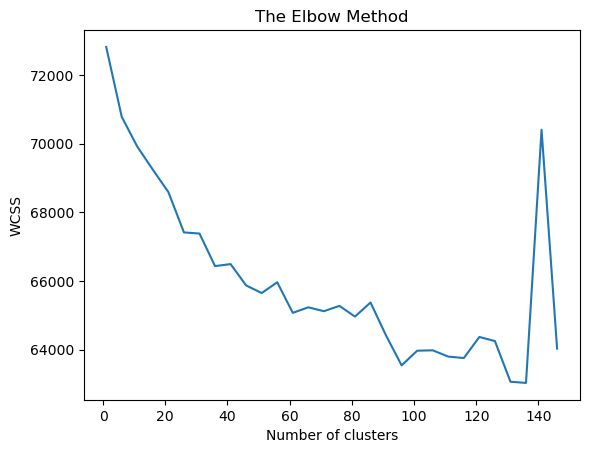

In [27]:
plt.plot(range(1, 150, 5), sse_lieferanten)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### V-measure

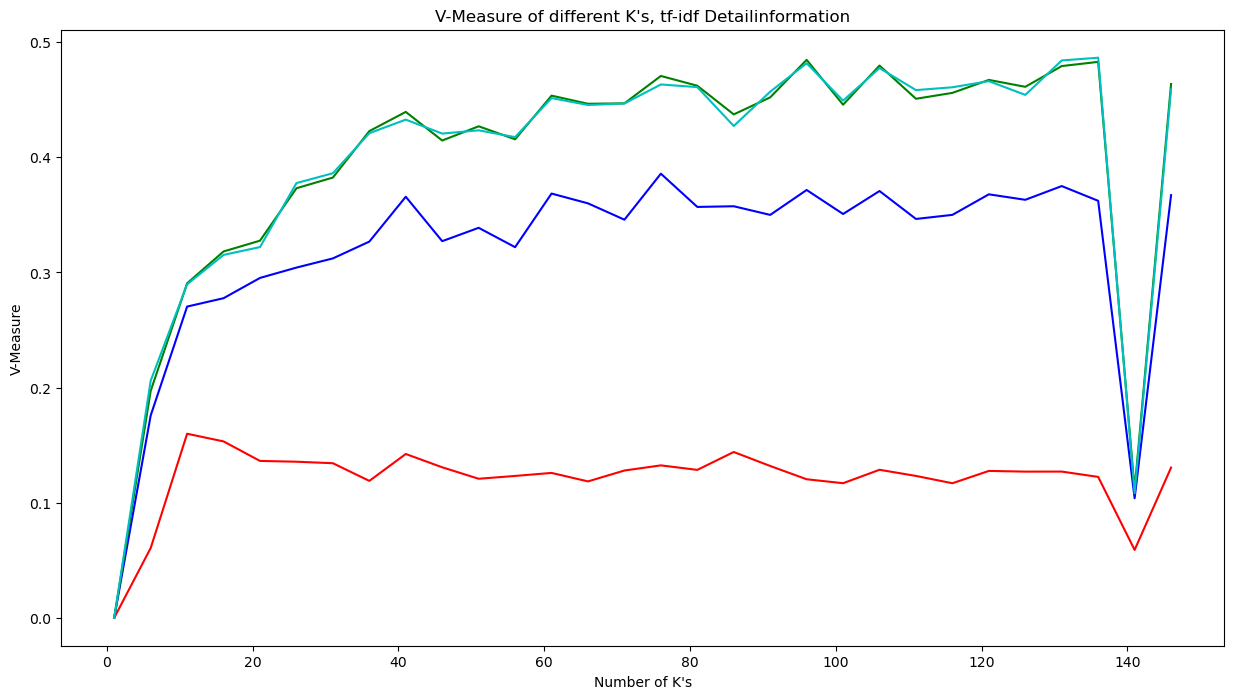

In [28]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), v_measures_df_tf_idf_lieferantendetailinformation['layer_1'], 'r', range(1, 150, 5), v_measures_df_tf_idf_lieferantendetailinformation['layer_2'], 'b', range(1, 150, 5), v_measures_df_tf_idf_lieferantendetailinformation['layer_3'], 'g', range(1, 150, 5), v_measures_df_tf_idf_lieferantendetailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf Detailinformation")

plt.show()

#### Homogeneity

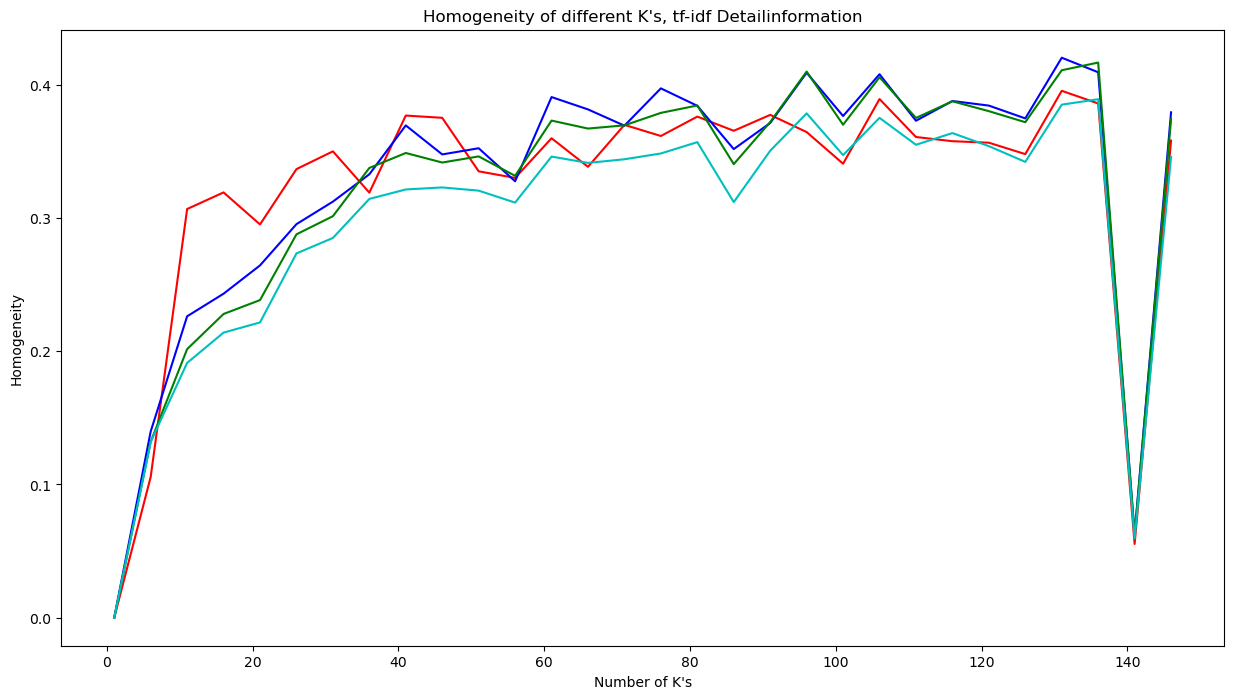

In [29]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), homogeneity_measures_df_tf_idf_lieferantendetailinformation['layer_1'], 'r', range(1, 150, 5), homogeneity_measures_df_tf_idf_lieferantendetailinformation['layer_2'], 'b', range(1, 150, 5), homogeneity_measures_df_tf_idf_lieferantendetailinformation['layer_3'], 'g', range(1, 150, 5), homogeneity_measures_df_tf_idf_lieferantendetailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf Detailinformation")

plt.show()

#### Completeness

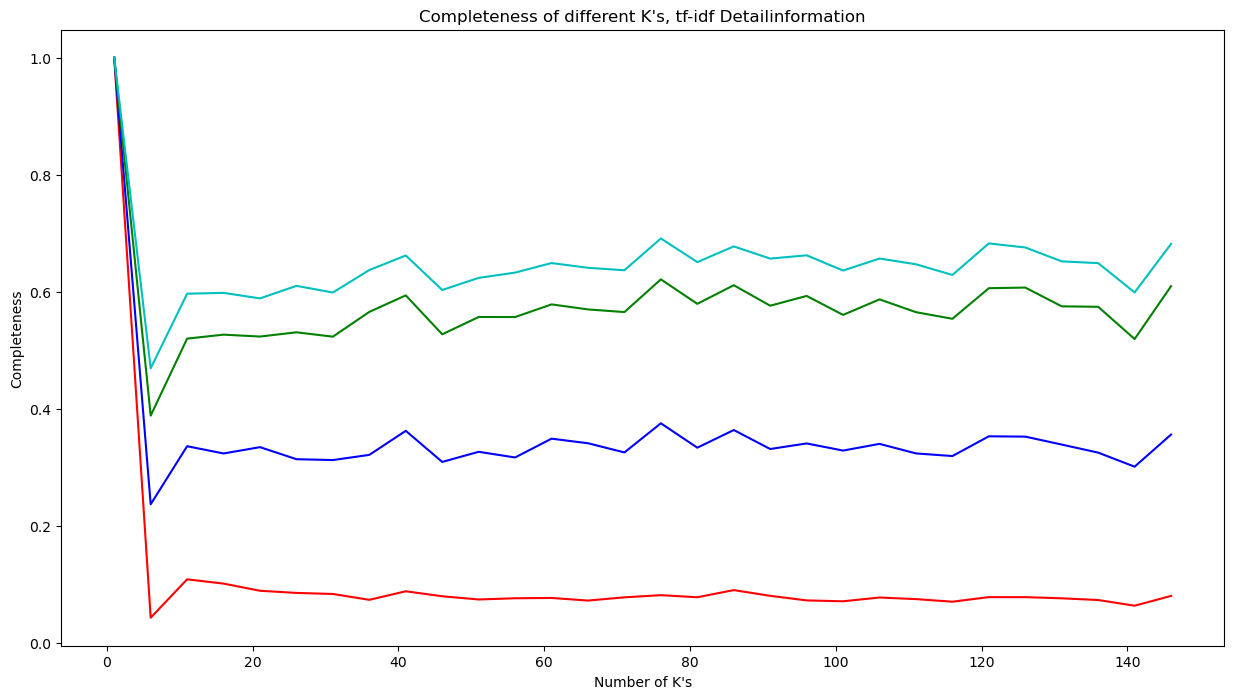

In [30]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), completness_measures_df_tf_idf_lieferantendetailinformation['layer_1'], 'r', range(1, 150, 5), completness_measures_df_tf_idf_lieferantendetailinformation['layer_2'], 'b', range(1, 150, 5), completness_measures_df_tf_idf_lieferantendetailinformation['layer_3'], 'g', range(1, 150, 5), completness_measures_df_tf_idf_lieferantendetailinformation['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf Detailinformation")

plt.show()

## 5) All

In [12]:
layered_descriptions_filtered.columns

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke', 'class_count', 'layer_1', 'layer_2',
       'layer_3', 'layer_4', 'concatenated'],
      dtype='object')

In [15]:

# layered_descriptions_filtered[layered_descriptions_filtered['Bezeichnung'].notnull() & layered_descriptions_filtered['Webbezeichnung'].notnull()]
# layered_descriptions_filtered.iloc[227908, 3]

# layered_descriptions_filtered.iloc[0, 3]
print(layered_descriptions_filtered.shape)
layered_descriptions_filtered[(layered_descriptions_filtered['Bezeichnung'] != ' ') & (layered_descriptions_filtered['Webbezeichnung'] != '  ') & (layered_descriptions_filtered['Detailinformation'] != ' ') & (layered_descriptions_filtered['LieferantenDetailinformation'] != ' ')]

# cleaned_layered_descriptions = layered_descriptions_filtered.loc[layered_descriptions_filtered['Bezeichnung'] != ' ']
# cleaned_layered_descriptions = cleaned_layered_descriptions.loc[cleaned_layered_descriptions['Webbezeichnung'] != '  ']
# cleaned_layered_descriptions = cleaned_layered_descriptions.loc[cleaned_layered_descriptions['Detailinformation'] != ' ']

(227910, 16)


,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation,LieferantenDetailinformation,OEMNummer,Hersteller,Marke,class_count,layer_1,layer_2,layer_3,layer_4,concatenated
0,2766168000,24292401,Standardkarteikarte,Karteikarte zu Bl A SIGEL,Karteikarte zu Stück A SIGEL,Karten A blanko weißzum Selbergestalten am PC,PC Karten weiß zum beidseitigen Bedrucken mit...,LP701,SIGEL GMBH,SIGEL,249,24,2429,242924,24292401,Karteikarte zu Bl A SIGEL Karteikarte zu Stü...
1,1000255650,24360202,Konferenzmappe,Schreibmappe A blau LEITZ Bebop,Schreibmappe A blau Bebop LEITZ,m Schreibblock u Ablagefächern Sichthüllen St...,Leitz Schreibmappe Bebop mit liniertem Schreib...,4580-00-37,Esselte Office Products GmbH,LEITZ,192,24,2436,243602,24360202,Schreibmappe A blau LEITZ Bebop Schreibmappe ...
2,1000228410,19140605,Tintenkartusche Druckkopf Tintenstrahldrucker,Inkjetpatrone T foto sw EPSON ml,Inkjetpatrone T foto schwarz ml EPSON,Inhalt ml Epson Ink Stylus Pro photo black ml T,NaN,C13T596100,UFP Austria GmbH,EPSON,4158,19,1914,191406,19140605,Inkjetpatrone T foto sw EPSON ml Inkjetpatron...
3,2015997000,24261301,Plotter Standardpapier,Plotterpapier mmxm weiß HP P g,Plotterpapier mmxm weiß g HP P,HP Inkjet Papier hochweiß sorgt für profession...,NaN,C6035A,UFP Austria GmbH,HP P,277,24,2426,242613,24261301,Plotterpapier mmxm weiß HP P g Plotterpapier...
4,1000167800,24292201,Heftstreifen,Heftstreifen weiß ESSELTE kurz,Heftstreifen weiß kurz ESSELTE,PP Foliemit Standardlochung cm und Sonderlochu...,Esselte Einhängeheftstreifen kurz Mit Lochung ...,1430618,LEITZ ACCO BRANDS GMBH & CO. KG,ESSELTE,199,24,2429,242922,24292201,Heftstreifen weiß ESSELTE kurz Heftstreifen ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200984,1000573346,24340205,Geschenkschachtel,Aufbewahrungskarton Eucalyptus RÖSSLER xmm,Aufbewahrungskarton Eucalyptus xmm RÖSSLER,xxmm,NaN,13521192673,Rössler Papier GmbH & Co.KG,RÖSSLER,4345,24,2434,243402,24340205,Aufbewahrungskarton Eucalyptus RÖSSLER xmm Au...
200985,1000560735,29090390,Geschirr nicht spezifiziert,Kaffeebecher Bär FÜR DICH ml Kleine Lieblinge,Kaffeebecher ml Bär FÜR DICH,Porzellan Spülmaschinengeeignet_xD_\nProduktma...,NaN,940332,La Vida,FÜR DICH,559,29,2909,290903,29090390,Kaffeebecher Bär FÜR DICH ml Kleine Lieblinge...
200992,1000574357,29100304,Papier Motivserviette,WeihnZelltuchserviette ATELIER cm lag,WeihnachtenZelltuchserviette Weihnachten Zellt...,Inhalt Stück lagig xcm,NaN,1109-23514,Braun + Company GmbH,ATELIER,6658,29,2910,291003,29100304,WeihnZelltuchserviette ATELIER cm lag Weihna...
200999,1000569659,16030290,Süßigkeit Schokolade nicht spezifiziert,Schokolade Liebe Grüße sortiert FÜR DICH gr,Schokolade Liebe Grüße gr FÜR DICH,Schokolade für Dich ist die ideale Aufmerksa...,NaN,435770,La Vida GmbH,FÜR DICH,956,16,1603,160302,16030290,Schokolade Liebe Grüße sortiert FÜR DICH gr S...


In [34]:
# vectorize with tf-idf

cleaned_layered_descriptions = layered_descriptions_filtered[(layered_descriptions_filtered['Bezeichnung'] != ' ') & (layered_descriptions_filtered['Webbezeichnung'] != '  ') & (layered_descriptions_filtered['Detailinformation'] != ' ') & (layered_descriptions_filtered['LieferantenDetailinformation'] != ' ')]
tfidf_matrix = vectorizer.fit_transform(cleaned_layered_descriptions['concatenated'])

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

v_measures_df_tf_idf_all_minibatchkmeans = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
homogeneity_measures_df_tf_idf_all_minibatchkmeans = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])
completness_measures_df_tf_idf_all_minibatchkmeans = pd.DataFrame(columns=['layer_1', 'layer_2', 'layer_3', 'layer_4'])


# A list holds the SSE values for each k
sse_all = []
v_measures = []
homogeneity_measures = []
completeness_measures = []

for k in range(1, 150, 5):
    print(k)
    kmeans = MiniBatchKMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(tfidf_matrix)
    sse_all.append(kmeans.inertia_)

    # calculating the v-measures for each of the subcategories/layers, and adding them to the v_measures_df dataframe
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    v_measures.append(v_measure_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    homogeneity_measures.append(homogeneity_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))

    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_1'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_2'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_3'], kmeans.labels_))
    completeness_measures.append(completeness_score(cleaned_layered_descriptions['layer_4'], kmeans.labels_))


    v_measures_df_tf_idf_all_minibatchkmeans.loc[len(v_measures_df_tf_idf_all_minibatchkmeans)] = v_measures
    homogeneity_measures_df_tf_idf_all_minibatchkmeans.loc[len(homogeneity_measures_df_tf_idf_all_minibatchkmeans)] = homogeneity_measures
    completness_measures_df_tf_idf_all_minibatchkmeans.loc[len(completness_measures_df_tf_idf_all_minibatchkmeans)] = completeness_measures

    v_measures = []
    homogeneity_measures = []
    completeness_measures = []



1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146


In [35]:
v_measures_df_tf_idf_all_minibatchkmeans.to_csv('calculated_files/evaluation_metric_dfs/v_measures_df_tf_idf_all_minibatchkmeans.csv', index=False)
homogeneity_measures_df_tf_idf_all_minibatchkmeans.to_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_df_tf_idf_all_minibatchkmeans.csv', index=False)
completness_measures_df_tf_idf_all_minibatchkmeans.to_csv('calculated_files/evaluation_metric_dfs/completness_measures_df_tf_idf_all_minibatchkmeans.csv', index=False)
np.save('calculated_files/sse/tfidf_sse_all.npy', sse_all)

# v_measures_df_tf_idf_all_minibatchkmeans = pd.read_csv('calculated_files/evaluation_metric_dfs/v_measures_df_tf_idf_all_minibatchkmeans.csv')
# homogeneity_measures_df_tf_idf_all_minibatchkmeans = pd.read_csv('calculated_files/evaluation_metric_dfs/homogeneity_measures_df_tf_idf_all_minibatchkmeans.csv')
# completness_measures_df_tf_idf_all_minibatchkmeans = pd.read_csv('calculated_files/evaluation_metric_dfs/completness_measures_df_tf_idf_all_minibatchkmeans.csv')
# sse_all = np.load('calculated_files/sse/tfidf_sse_all.npy', allow_pickle=True)


### Plotting


elbow

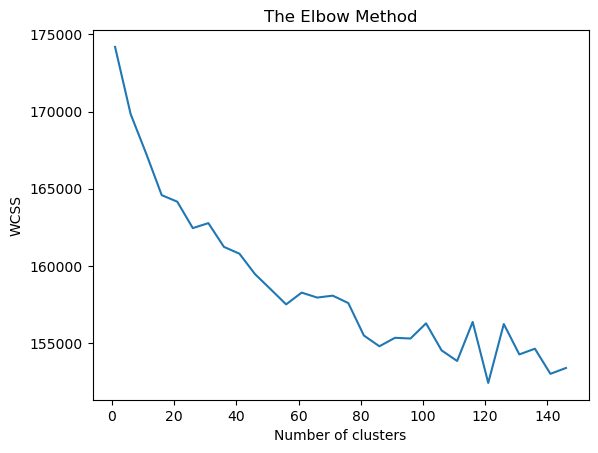

In [36]:
plt.plot(range(1, 150, 5), sse_all)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### V-measure

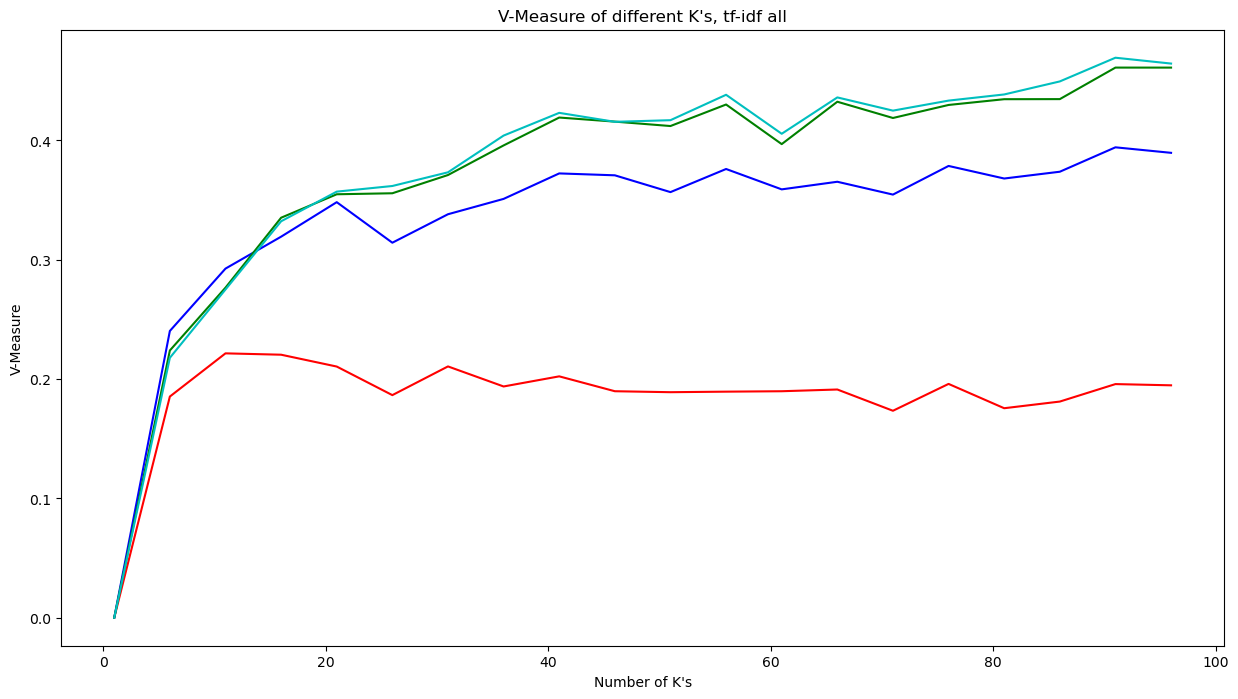

In [18]:
plot, ax = plt.subplots()
plt.plot(range(1, 100, 5), v_measures_df_tf_idf_all_minibatchkmeans['layer_1'], 'r', range(1, 100, 5), v_measures_df_tf_idf_all_minibatchkmeans['layer_2'], 'b', range(1, 100, 5), v_measures_df_tf_idf_all_minibatchkmeans['layer_3'], 'g', range(1, 100, 5), v_measures_df_tf_idf_all_minibatchkmeans['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf all")

plt.show()

After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

In [25]:
v_measures_df_tf_idf_all_minibatchkmeans['layer_1'].shape

(20,)

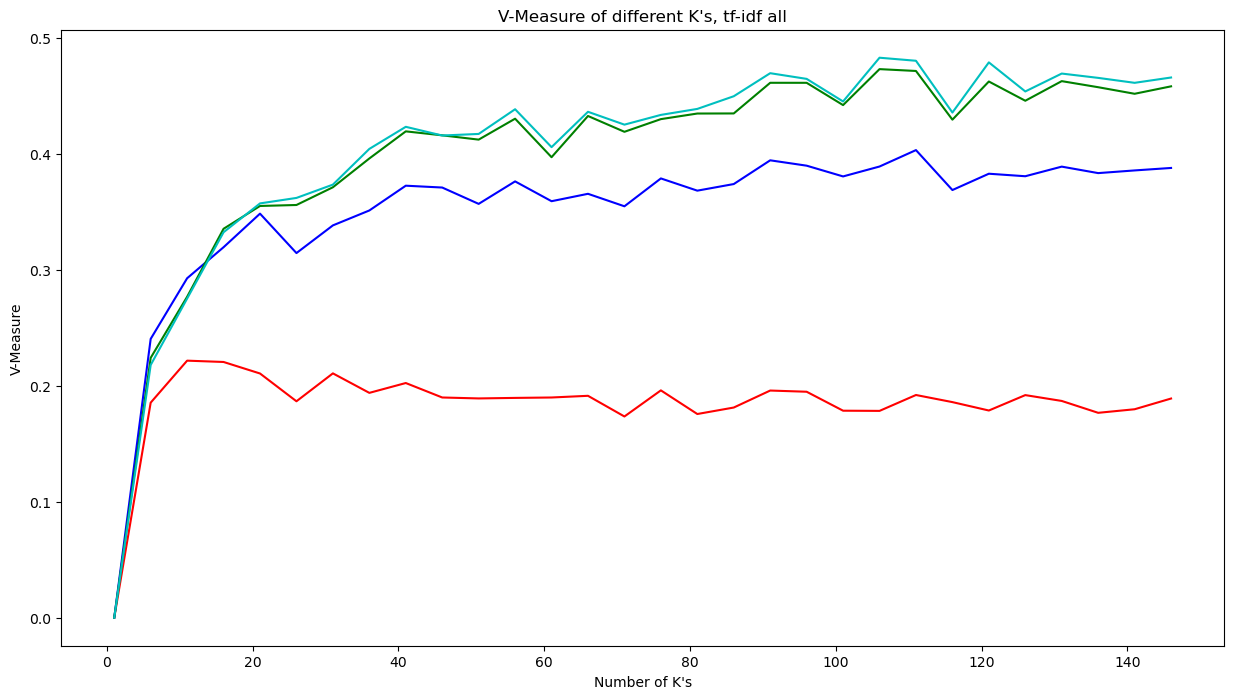

In [37]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), v_measures_df_tf_idf_all_minibatchkmeans['layer_1'], 'r', range(1, 150, 5), v_measures_df_tf_idf_all_minibatchkmeans['layer_2'], 'b', range(1, 150, 5), v_measures_df_tf_idf_all_minibatchkmeans['layer_3'], 'g', range(1, 150, 5), v_measures_df_tf_idf_all_minibatchkmeans['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("V-Measure")
ax.set_title("V-Measure of different K's, tf-idf all")

plt.show()

#### Homogeneity

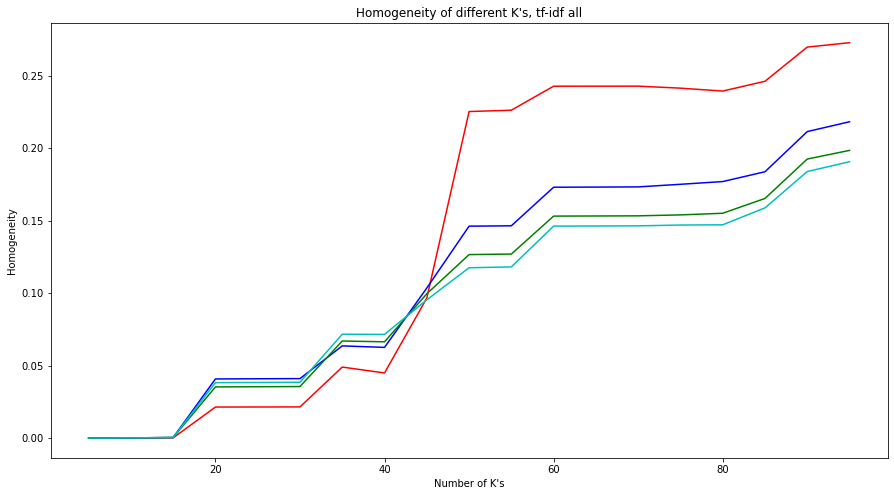

In [38]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_1'], 'r', range(5, 100, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_2'], 'b', range(5, 100, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_3'], 'g', range(5, 100, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf all")

plt.show()

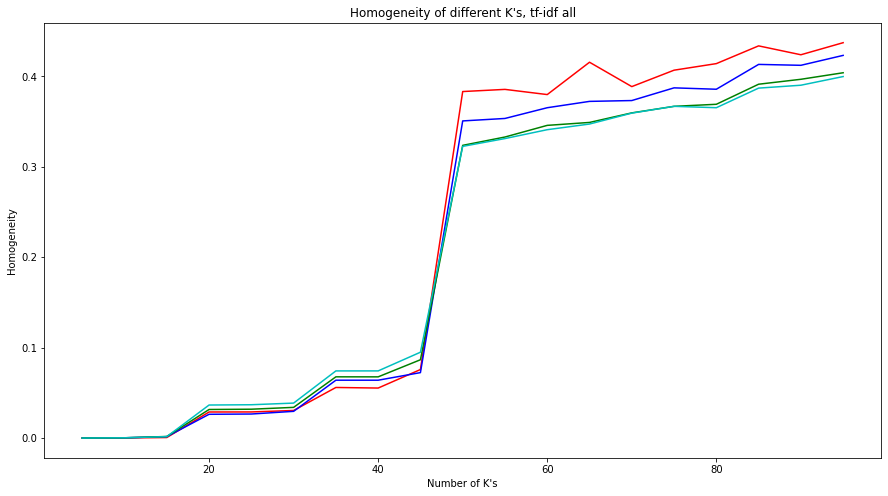

In [ ]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_1'], 'r', range(1, 150, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_2'], 'b', range(1, 150, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_3'], 'g', range(1, 150, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf all")

plt.show()

After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

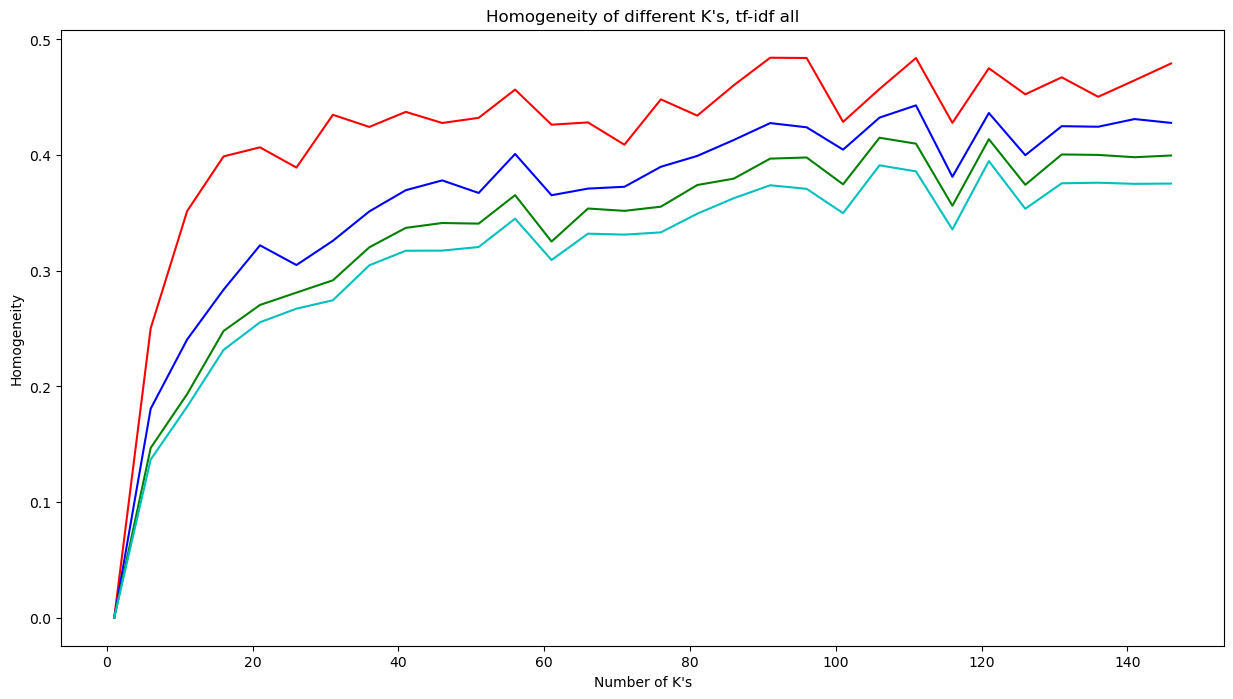

In [38]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_1'], 'r', range(1, 150, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_2'], 'b', range(1, 150, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_3'], 'g', range(1, 150, 5), homogeneity_measures_df_tf_idf_all_minibatchkmeans['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Homogeneity")
ax.set_title("Homogeneity of different K's, tf-idf all")

plt.show()

#### Completeness

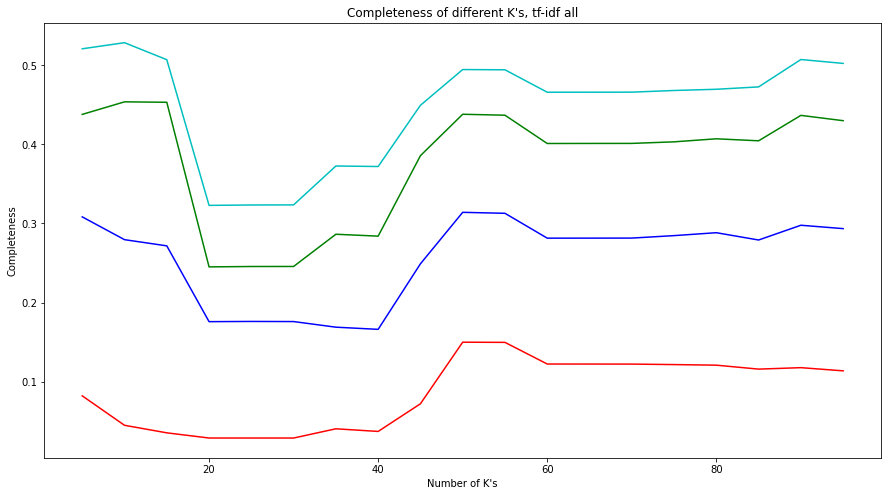

In [39]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_1'], 'r', range(5, 100, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_2'], 'b', range(5, 100, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_3'], 'g', range(5, 100, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf all")

plt.show()

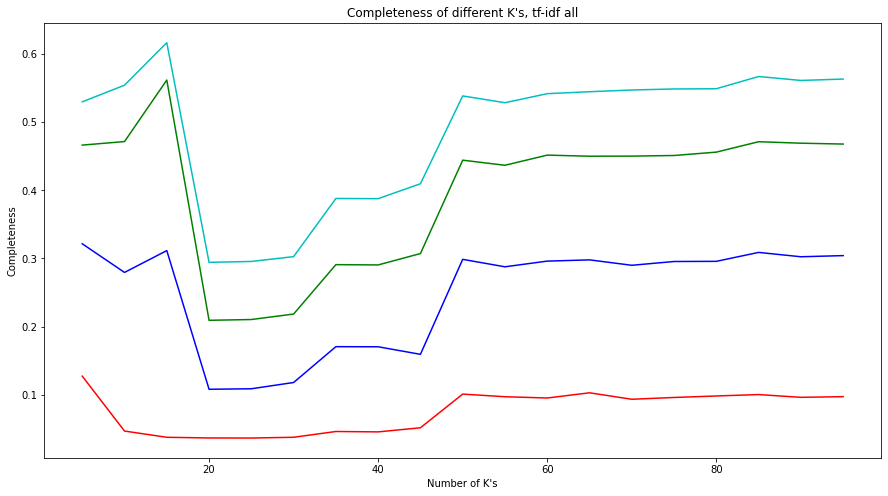

In [56]:
plot, ax = plt.subplots()
plt.plot(range(5, 100, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_1'], 'r', range(5, 100, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_2'], 'b', range(5, 100, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_3'], 'g', range(5, 100, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf all")

plt.show()

After replacing dashes with space and maintaining the rows with other columns (Bezeichnung, Webbezeichnung|) having empty values.

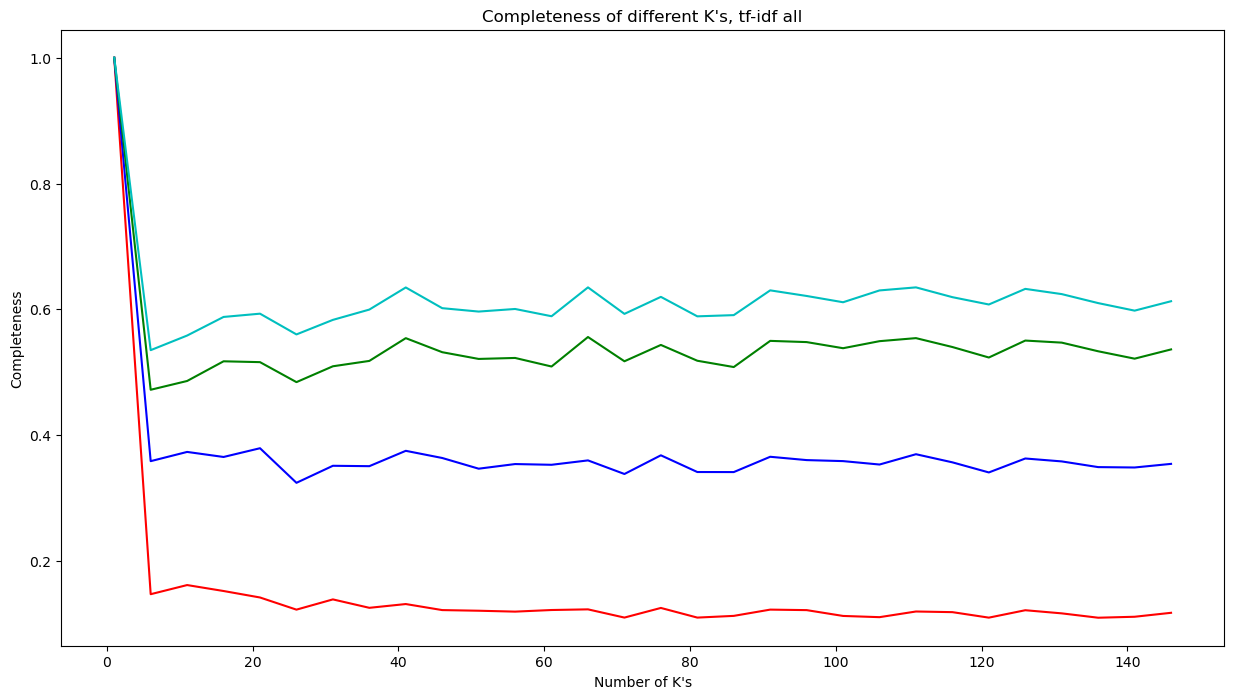

In [39]:
plot, ax = plt.subplots()
plt.plot(range(1, 150, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_1'], 'r', range(1, 150, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_2'], 'b', range(1, 150, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_3'], 'g', range(1, 150, 5), completness_measures_df_tf_idf_all_minibatchkmeans['layer_4'], 'c')
plot.set_size_inches(15, 8)

ax.set_xlabel("Number of K's")
ax.set_ylabel("Completeness")
ax.set_title("Completeness of different K's, tf-idf all")

plt.show()

In [21]:
completness_measures_df_tf_idf_all_minibatchkmeans

,layer_1,layer_2,layer_3,layer_4
0,1.000000,1.000000,1.000000,1.000000
1,0.233598,0.326539,0.445457,0.512607
2,0.175730,0.332874,0.448219,0.517075
3,0.162925,0.312415,0.437142,0.505629
4,0.149517,0.308586,0.441815,0.526687
5,0.135528,0.343259,0.502674,0.583920
6,0.126306,0.305929,0.448626,0.525822
7,0.128422,0.336280,0.484047,0.568726
8,0.126106,0.329447,0.487034,0.569379
9,0.121260,0.339472,0.495583,0.576868


# HDBSCAN

## Bezeichnung

In [10]:
cleaned_layered_descriptions.shape

(201001, 15)

In [23]:
# vectorize with tf-idf

cleaned_layered_descriptions = layered_descriptions_filtered.loc[layered_descriptions_filtered['Bezeichnung'] != ' ']
tfidf_matrix = vectorizer.fit_transform(cleaned_layered_descriptions['Bezeichnung'])


# clusterer = HDBSCAN(min_cluster_size=200, n_jobs=8, cluster_selection_epsilon=0.001)
clusterer = HDBSCAN(min_cluster_size=1000, min_samples= 10, n_jobs=8, cluster_selection_epsilon=1, algorithm='kdtree')


# @jit(target_backend='cuda')
def dbscan_func(): 
    cluster_labels = clusterer.fit_predict(tfidf_matrix)
    return clusterer, X_train, cluster_labels

clusterer, X_train, cluster_labels = dbscan_func()



ValueError: Sparse data matrices only support algorithm `brute`.

## Webbezeichnung

## Detailinformation

## All